In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run ../helper/preprocess.py
%run ../helper/aggregate.py
%run ../helper/utils.py

In [ ]:
# Function to compute 'Size' and 'Scale'
def compute_size_and_scale(row):
    # Your logic here to compute size and scale based on row content.
    # For demonstration, I'm computing them based on 'Alpha' and 'Step' columns.
    algo = row['Algo']
    dim = row['Dim']
    alpha = row['Alpha']
    if algo == 'full':
        size = 4
        scale = 1
    elif algo == 'lokr':
        factor = row['Factor']
        if factor == 12:
            size = 1
        elif factor == 8:
            size = 2
        elif factor == 4:
            size = 3
        scale = 1
    elif algo == 'loha':
        if dim == 4:
            size = 2
        elif dim == 16:
            size = 3
        scale = alpha/dim
    elif algo == 'lora':
        if dim == 8:
            size = 2
        elif dim == 32:
            size = 3
        scale = alpha/dim
    return pd.Series({'Size': size, 'Scale': scale})

In [481]:
metrics_file = '../metrics/ddim_sd15_metrics.csv'
config_file = '../../exp_configs/config_mapping.csv'

keywords_to_exclude = ['1027', '1003', '1013']
# keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    rank=True,
    metrics_to_include=None,
    keywords_to_exclude=keywords_to_exclude)

In [181]:
metrics_aggregated = aggregate_metrics(metrics_processed, level='All', group_seeds=False)
display(metrics_aggregated)

Config  Algo    Preset      Lr      Dim  \
Architecture                                                                 
Condition                                                                    
Statistics                                                                   
0                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
1                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
2                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
3                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
4                   exp-1001-sd15-lora8a4  lora  attn-mlp  0.0005      8.0   
..                                    ...   ...       ...     ...      ...   
175           exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
176           exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
177           exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
178           exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   
179           exp-1026-sd15-lokrf8-lr1e-3  lokr  attn-mlp  0.0010  10000.0   

             Alpha Factor Seed Step Image Similarity  ...       Vendi  \
Architecture                               CLIP-crop  ... ConvNeXt V2   
Condition                                         in  ...         out   
Statistics                                      mean  ...        mean   
0              4.0    NaN    a   10         0.581258  ...    0.441186   
1              4.0    NaN    a   30         0.538970  ...    0.476813   
2              4.0    NaN    a   50         0.431778  ...    0.426172   
3              4.0    NaN    b   10         0.648607  ...    0.516359   
4              4.0    NaN    b   30         0.517077  ...    0.390835   
..             ...    ...  ...  ...              ...  ...         ...   
175            1.0    8.0    b   30         0.516378  ...    0.540179   
176            1.0    8.0    b   50         0.364790  ...    0.688948   
177            1.0    8.0    c   10         0.577876  ...    0.506932   
178            1.0    8.0    c   30         0.383820  ...    0.617234   
179            1.0    8.0    c   50         0.296232  ...    0.691586   

                                                                          \
Architecture                                  DINOv2                       
Condition                trigger                  in                 out   
Statistics      stderr      mean    stderr      mean    stderr      mean   
0             0.020191  0.540425  0.027036  0.468543  0.030532  0.393396   
1             0.026753  0.431907  0.029879  0.460765  0.024728  0.501015   
2             0.027111  0.328639  0.031102  0.500129  0.029721  0.482374   
3             0.025671  0.576007  0.028028  0.512764  0.028957  0.530636   
4             0.032484  0.412593  0.033308  0.464088  0.031950  0.420656   
..                 ...       ...       ...       ...       ...       ...   
175           0.034751  0.326117  0.031064  0.435761  0.032572  0.575781   
176           0.034800  0.428519  0.037133  0.580850  0.031702  0.685315   
177           0.032582  0.407369  0.028574  0.390008  0.032005  0.503608   
178           0.028911  0.391708  0.031290  0.525993  0.034730  0.692052   
179           0.030026  0.448292  0.034320  0.529142  0.029504  0.590562   

                                            
Architecture                                
Condition                trigger            
Statistics      stderr      mean    stderr  
0             0.024680  0.474388  0.028709  
1             0.026893  0.366769  0.029271  
2             0.028764  0.333411  0.028804  
3             0.026741  0.509615  0.030458  
4             0.028924  0.437991  0.031103  
..                 ...       ...       ...  
175           0.034208  0.356889  0.030546  
176           0.033773  0.436743  0.036889  
177           0.032749  0.346446  0.031610  
178           0.023558  0.395769  0.033466

In [309]:
x_vars_prelim = ['Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step']
metrics_aggregated['Algo'] = metrics_aggregated['Algo'].astype('category')
metrics_aggregated['Preset'] = metrics_aggregated['Preset'].astype('category')
X_aux = metrics_aggregated[x_vars_prelim].copy()
X_aux.columns = X_aux.columns.droplevel([1, 2, 3])

In [310]:
# Apply the function and create new columns
new_columns = X_aux.apply(compute_size_and_scale, axis=1)

# Merge the new columns with the original DataFrame
X = pd.concat([X_aux, new_columns], axis=1)
X = X.drop(columns=['Dim', 'Alpha', 'Factor'])
display(X)

Algo    Preset      Lr  Step  Size  Scale
0    lora  attn-mlp  0.0005    10   2.0    0.5
1    lora  attn-mlp  0.0005    30   2.0    0.5
2    lora  attn-mlp  0.0005    50   2.0    0.5
3    lora  attn-mlp  0.0005    10   2.0    0.5
4    lora  attn-mlp  0.0005    30   2.0    0.5
..    ...       ...     ...   ...   ...    ...
175  lokr  attn-mlp  0.0010    30   2.0    1.0
176  lokr  attn-mlp  0.0010    50   2.0    1.0
177  lokr  attn-mlp  0.0010    10   2.0    1.0
178  lokr  attn-mlp  0.0010    30   2.0    1.0
179  lokr  attn-mlp  0.0010    50   2.0    1.0

[180 rows x 6 columns]

In [184]:
x_vars = X.columns

# CatBoost

In [125]:
import shap
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

In [126]:
shap.initjs()

## All

In [263]:
cat_features = ['Algo', 'Preset']
y = np.array(metrics_aggregated[('Image Similarity', 'DINOv2-padding', 'in', 'mean')])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [264]:
model = CatBoostRegressor(iterations=300,
                          learning_rate=0.1,
                          random_seed=123,
                          nan_mode='Min')
model.fit(X_train,
          np.array(y_train),
          verbose=False,
          plot=True,
          cat_features=cat_features)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [265]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.08
R2: 0.56


In [205]:
sorted_feature_importance = model.feature_importances_.argsort()

In [206]:
plot_orders = {
    'Algo': ['lora', 'loha', 'lokr'],
    'Preset': ['attn-only', 'attn-mlp', 'full'],
    'Dim': [4, 8, 16, 32, 10000],
    'Alpha': [1, 2, 4, 8, 16],
    'Lr': sorted(X_train.Lr.unique())
}

In [207]:
df = X_train.copy()

# Replacing the values
for col in df.columns:
    if col in plot_orders:
        df[col] = df[col].apply(lambda x: plot_orders[col].index(x)
                                if x in plot_orders[col] else x)

Text(0.5, 0, 'CatBoost Feature Importance')

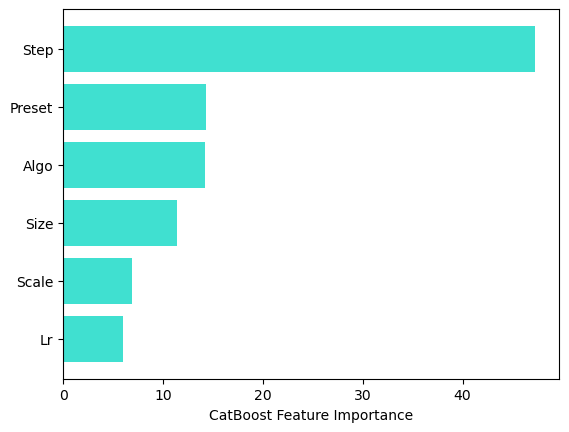

In [208]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(x_vars[sorted_feature_importance],
         model.feature_importances_[sorted_feature_importance],
         color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [209]:
for col in df.columns:
    df[col] = df[col].astype('float64')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


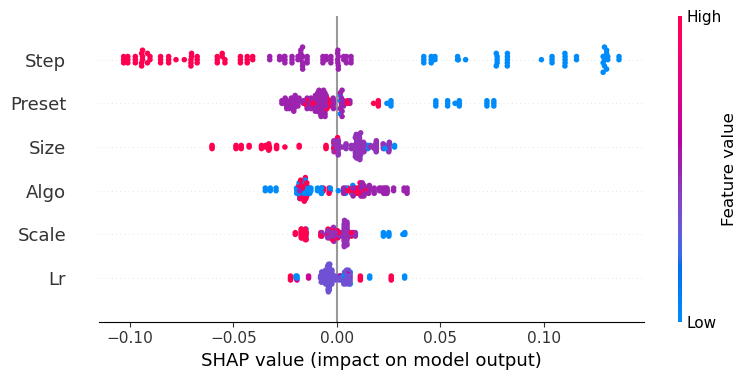

In [210]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, df)

In [196]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [94]:
df

Algo Preset  Lr  Dim  Alpha  Factor  Step
156    2      2   2    4      0     8.0    10
40     0      0   2    1      2     NaN    30
174    2      1   3    4      0     8.0    10
123    1      1   4    0      1     NaN    10
74     1      1   2    2      3     NaN    50
..   ...    ...  ..  ...    ...     ...   ...
8      0      1   2    1      2     NaN    50
73     1      1   2    2      3     NaN    30
144    2      1   2    4      0    12.0    10
118    1      1   4    0      1     NaN    30
99     1      0   2    0      1     NaN    10

[151 rows x 7 columns]

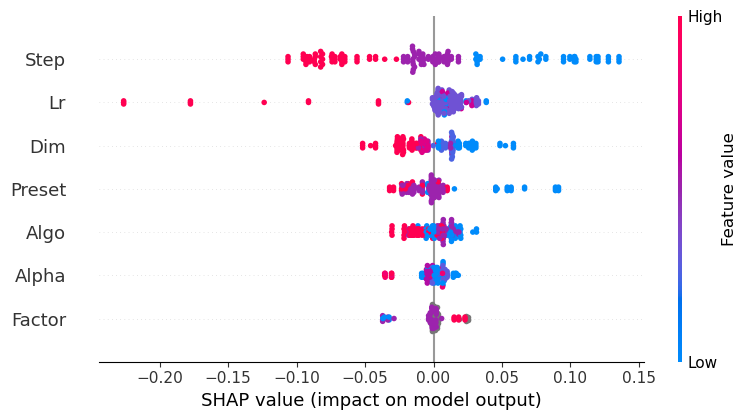

In [97]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, df)

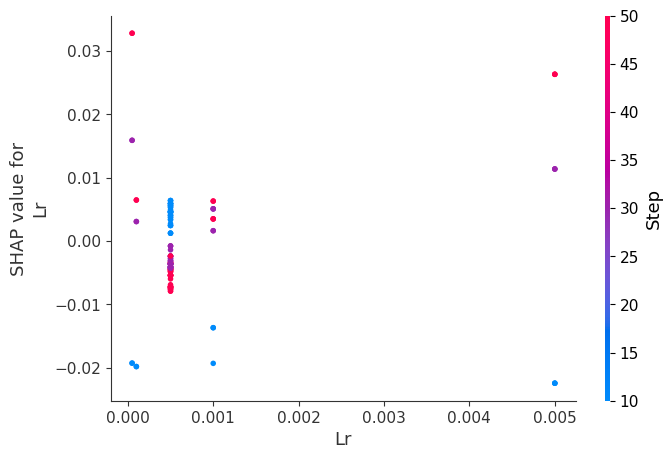

In [215]:
shap.dependence_plot("Lr", shap_values, X_train)

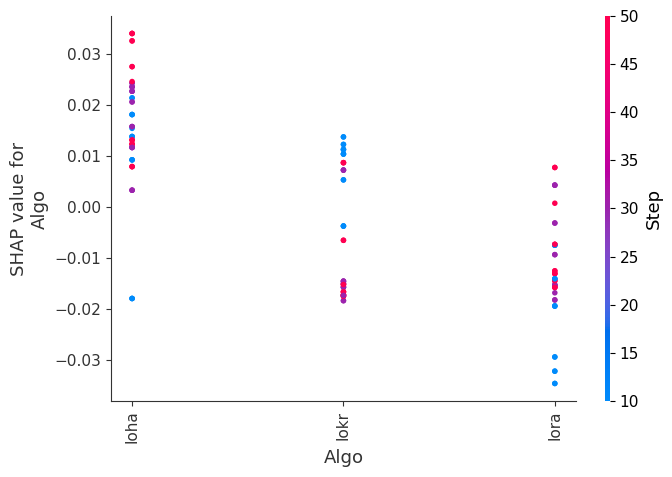

In [216]:
shap.dependence_plot("Algo", shap_values, X_train)

## Per category

In [482]:
metrics_aggregated_cat = aggregate_metrics(metrics_processed, level='Category', group_seeds=False)

In [266]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [571]:
class FeatureAnalysis(object):
    def __init__(self, metrics, transform=True, keyword=None, drop_scale=True):
        self.metrics = metrics
        x_vars_prelim = [
            'Algo', 'Preset', 'Lr', 'Dim', 'Alpha', 'Factor', 'Step'
        ]
        X_aux = metrics[x_vars_prelim].copy()
        X_aux.columns = X_aux.columns.droplevel([1, 2, 3])
        if transform:
            new_columns = X_aux.apply(compute_size_and_scale, axis=1)
            X = pd.concat([X_aux, new_columns], axis=1)
            self.X = X.drop(columns=['Dim', 'Alpha', 'Factor'])
            if drop_scale:
                self.X = self.X.drop(columns=['Scale'])
            # Rows where Size == 1
            rows_to_repeat = self.X[self.X['Size'] == 1]
            # Append these rows twice to the original DataFrame
            self.X_new = pd.concat([self.X, rows_to_repeat], ignore_index=True)
        else:
            self.X = X_aux
        self.x_vars = self.X.columns
        self.cat_features = ['Algo', 'Preset']
        self.keyword = keyword
        self.X_for_plot = self.transform_X_for_plot(self.X)

    def transform_X_for_plot(self, X):
        plot_orders = {
            'Algo': ['lora', 'loha', 'lokr'],
            'Preset': ['attn-only', 'attn-mlp', 'full'],
            'Dim': [4, 8, 16, 32, 10000],
            'Alpha': [1, 2, 4, 8, 16],
            'Lr': sorted(X.Lr.unique())
        }
        df = X.copy()
        # Replacing the values
        for col in df.columns:
            if col in plot_orders:
                df[col] = df[col].apply(lambda x: plot_orders[col].index(x)
                                        if x in plot_orders[col] else x)
        for col in df.columns:
            df[col] = df[col].astype('float64')
        return df

    def fit(self, metric_names, test_size, random_state=5, **kwargs):
        if not isinstance(metric_names, list):
            metric_names = [metric_names]
        self.models = {}
        for metric_name in metric_names:
            print(f'Fitting {metric_name}')
            model = self.fit_single(metric_name, test_size, random_state,
                                    **kwargs)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(self.X)
            self.models[metric_name] = {
                'model': model,
                'explainer': explainer,
                'shap_values': shap_values,
            }

    def fit_single(self,
                   metric_name,
                   test_size=None,
                   random_state=5,
                   **kwargs):
        y = np.array(self.metrics[metric_name + ('mean', )])
        if test_size is not None:
            X_train, X_test, y_train, y_test = train_test_split(
                self.X, y, test_size=test_size, random_state=random_state)
        else:
            X_train, y_train = self.X, y
        model = CatBoostRegressor(iterations=300,
                                  learning_rate=0.1,
                                  random_seed=123,
                                  nan_mode='Min')
        model.fit(X_train,
                  y_train,
                  cat_features=self.cat_features,
                  verbose=False,
                  plot=False)

        pred = model.predict(X_train)
        rmse = np.sqrt(mean_squared_error(y_train, pred))
        r2 = r2_score(y_train, pred)
        print('Training performance')
        print('RMSE: {:.2f}'.format(rmse))
        print('R2: {:.2f}'.format(r2))
        if test_size is not None:
            pred = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, pred))
            r2 = r2_score(y_test, pred)
            print('Testing performance')
            print('RMSE: {:.2f}'.format(rmse))
            print('R2: {:.2f}'.format(r2))
        return model

    def plot_importance(self, metric_name, save=False, save_name=None):
        model = self.models[metric_name]['model']
        sorted_feature_importance = model.feature_importances_.argsort()
        plt.barh(self.x_vars[sorted_feature_importance],
                 model.feature_importances_[sorted_feature_importance],
                 color='turquoise')
        title = f"{self.keyword}_{metric_name}_feature_importance"
        plt.xlabel(f"CatBoost Feature Importance for {metric_name}")
        plt.title(title)
        if save:
            if save_name is None:
                save_name = os.path.join(
                    f"figures/feature_importance/{title}.png")
            plt.savefig(save_name)

In [515]:
metric_types = ['Image Similarity', 'Text Similarity', 'Vendi']
encoders = ['DINOv2', 'CLIP', 'DINOv2']
modes = ['padding']
prompt_types = ['in', 'trigger', 'out']

metrics_to_include = get_metric_list(metric_types, encoders, modes,
                                     prompt_types, style_with_base_model=False)

In [516]:
del metrics_to_include[3]
del metrics_to_include[3]
del metrics_to_include[4]

In [517]:
metrics_to_include

[('Image Similarity', 'DINOv2-padding', 'in'),
 ('Image Similarity', 'DINOv2-padding', 'trigger'),
 ('Image Similarity', 'DINOv2-padding', 'out'),
 ('Text Similarity', 'CLIP', 'out'),
 ('Vendi', 'DINOv2', 'trigger'),
 ('Vendi', 'DINOv2', 'out')]

In [568]:
categories = ['people', 'anime', 'scene', 'stuffed_toy', 'style']
metrics_per_category = {}

for category in categories:
    metrics_per_category[category] = metrics_aggregated_cat[metrics_aggregated_cat['Category']==category]
print(metrics_per_category['people'].shape)

(162, 142)


### People

In [610]:
category = 'people'

analysis = FeatureAnalysis(metrics_per_category[category], keyword=category)

In [611]:
analysis.fit(metrics_to_include, test_size=None)

Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.14
R2: 0.38
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.12
R2: 0.67
Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.15
R2: 0.50
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.14
R2: 0.62
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.14
R2: 0.44
Fitting ('Vendi', 'DINOv2', 'out')
Training performance
RMSE: 0.14
R2: 0.33


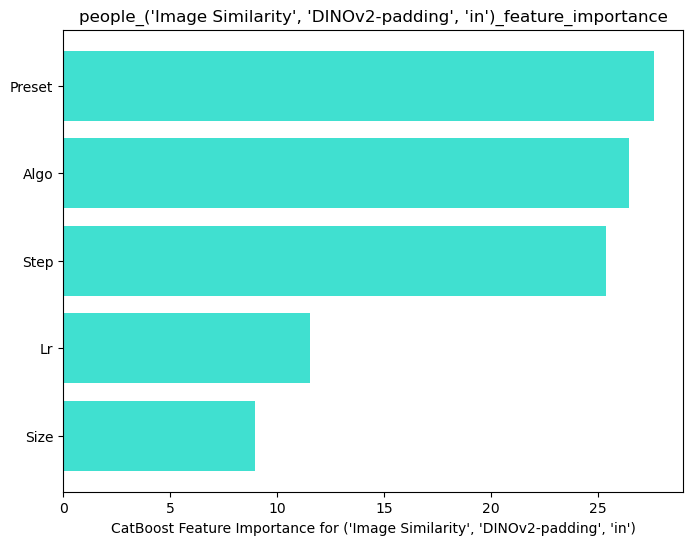

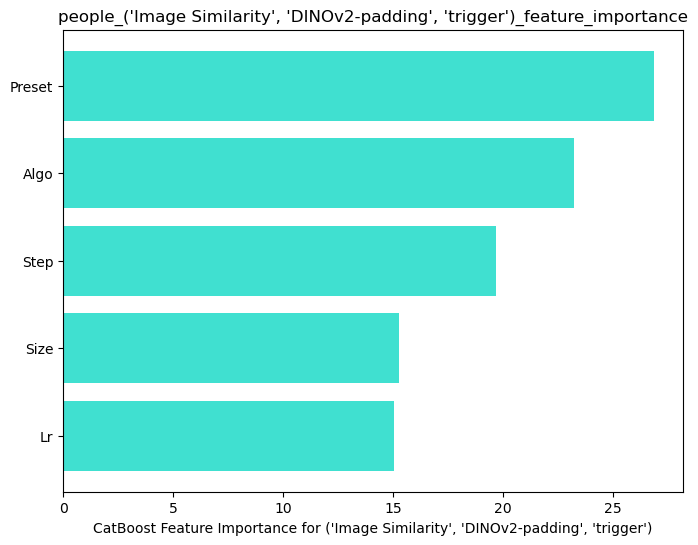

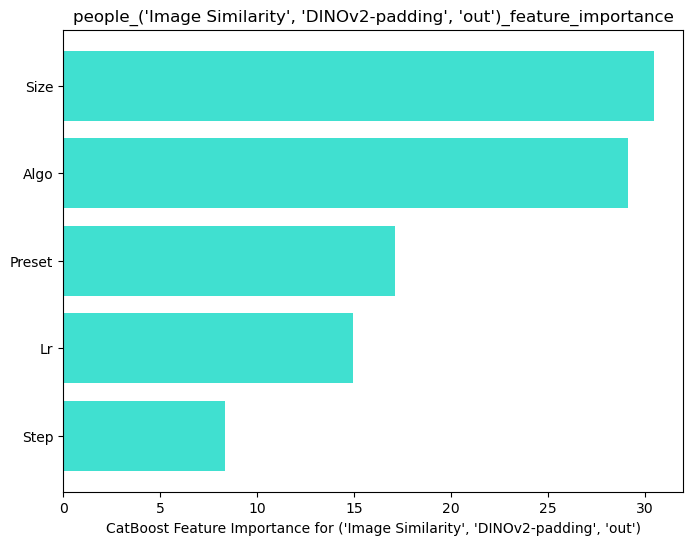

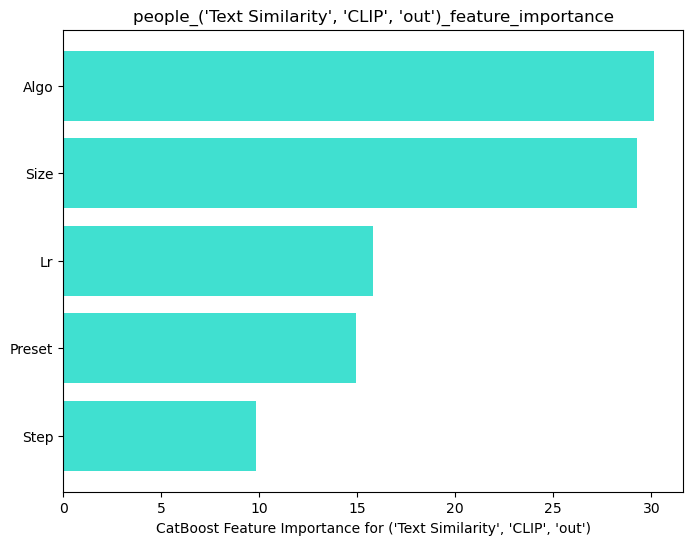

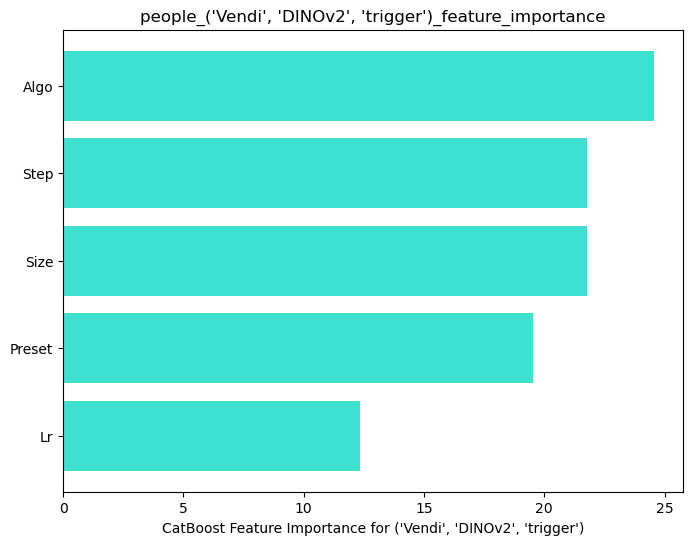

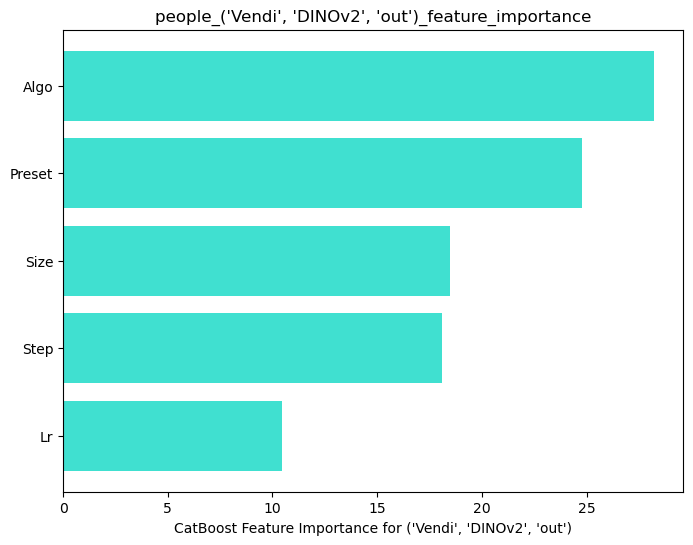

In [575]:
for metric in metrics_to_include:
    plt.figure(figsize=(8, 6))
    analysis.plot_importance(metric_name=metric)

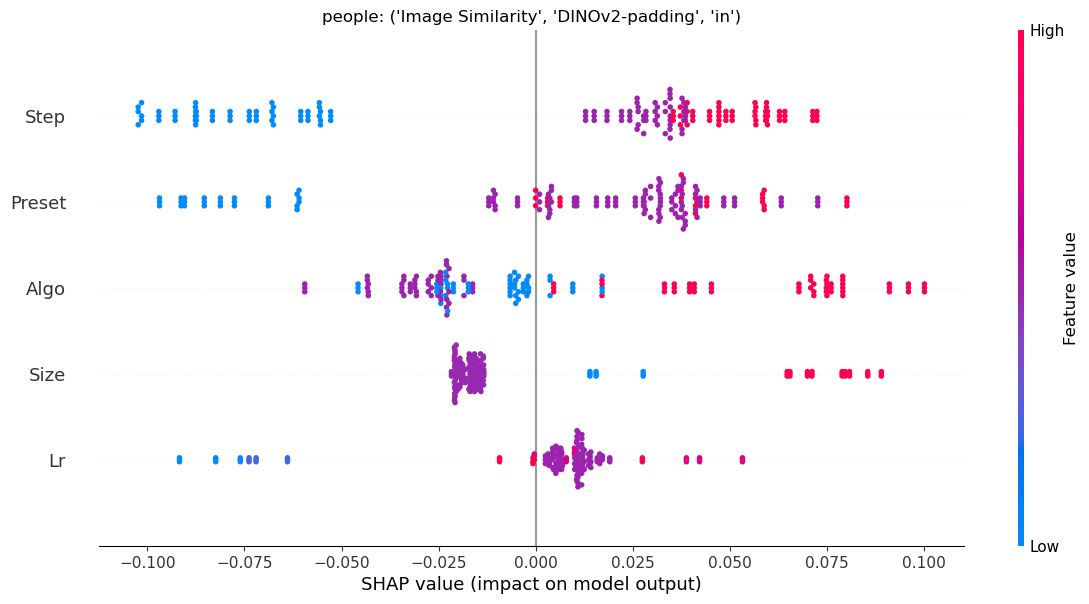

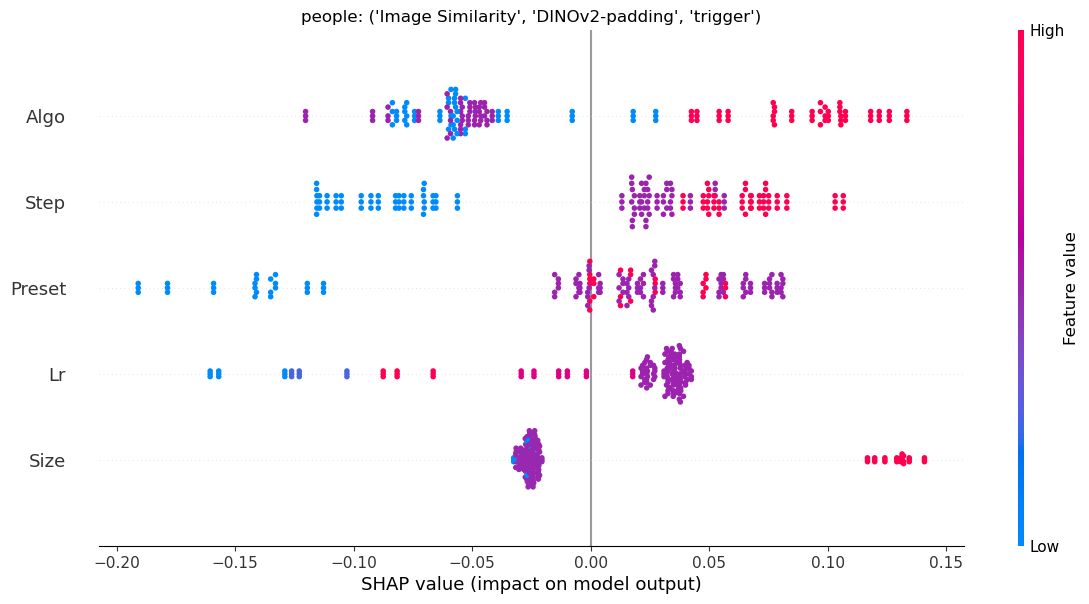

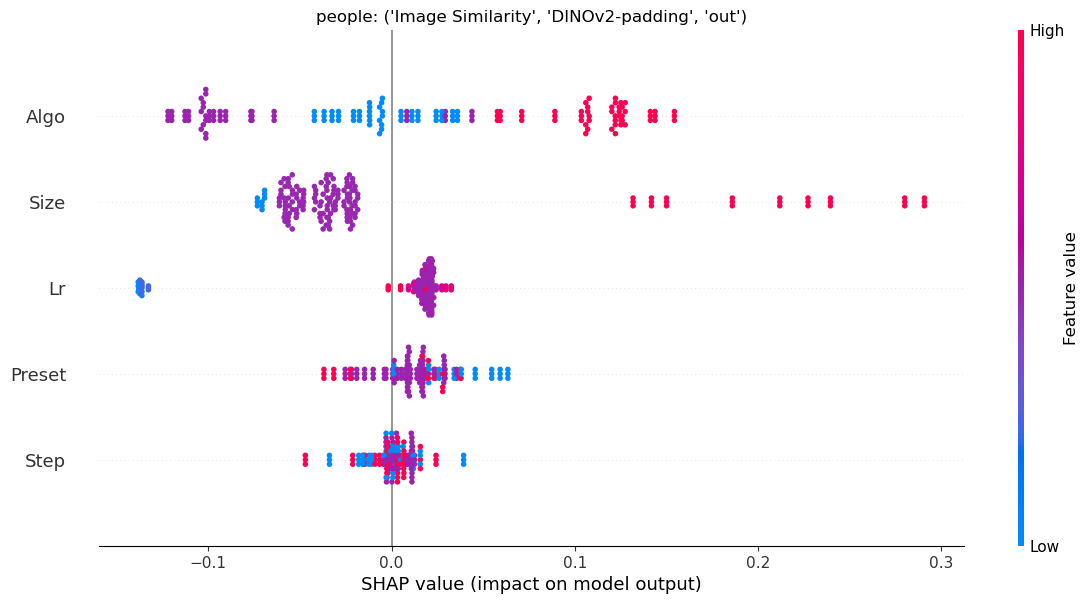

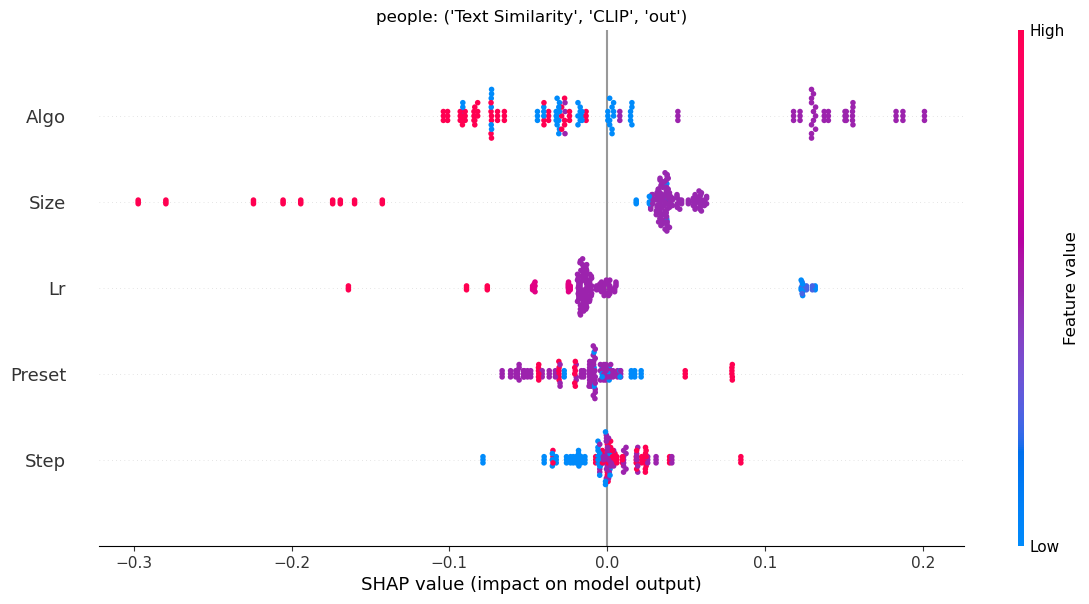

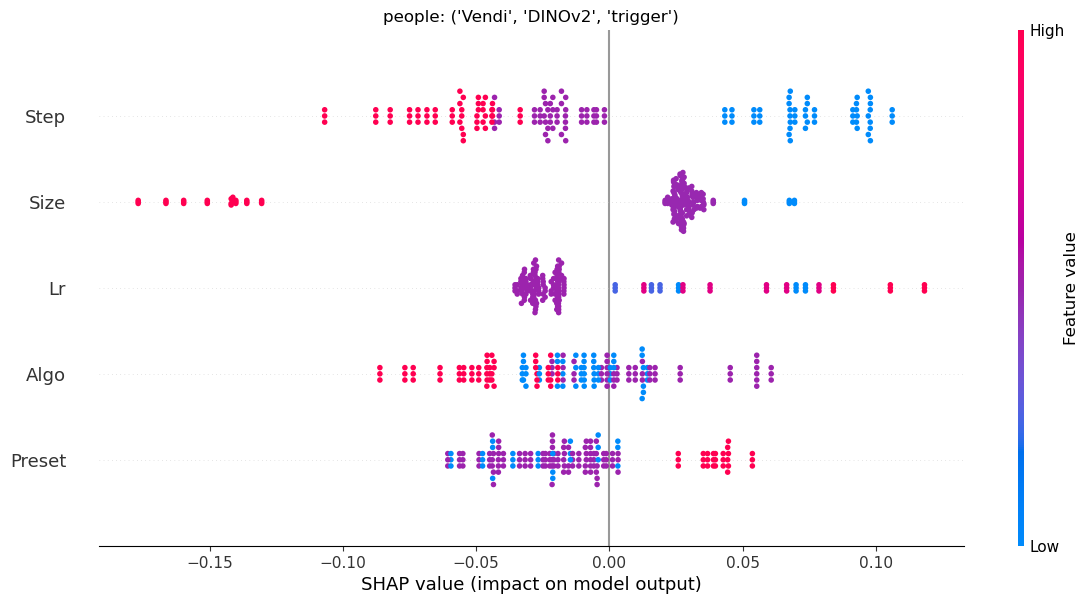

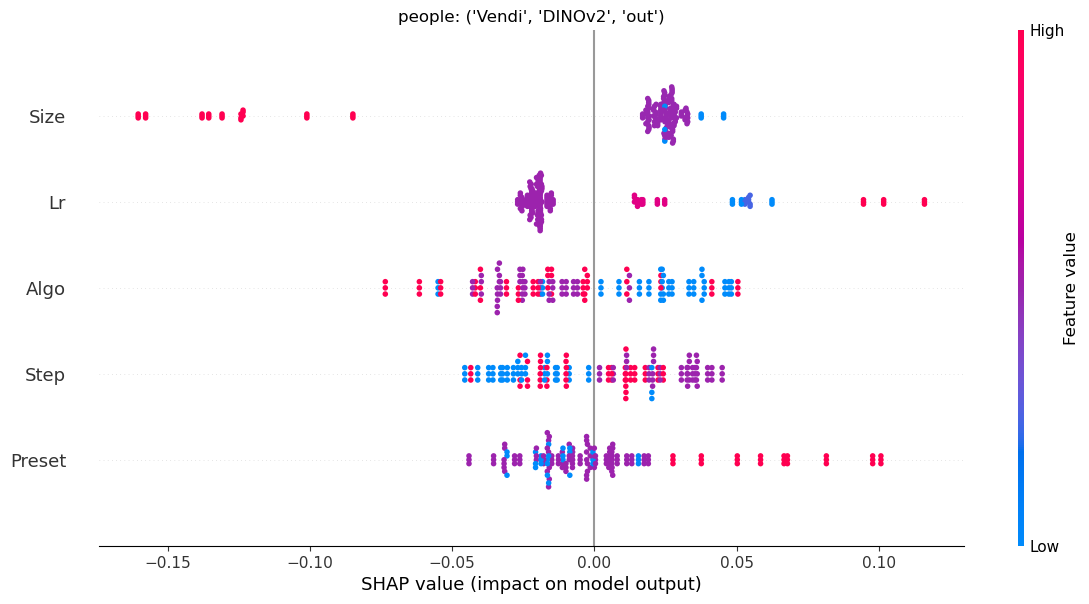

In [616]:
shap_values_list = []

for metric in metrics_to_include:
    plt.figure(figsize=(10, 8))
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      show=False,
                      plot_size=(12, 6))
    shap_values_list.append(shap_values)
    plt.title(f"{category}: {metric}")
    plt.savefig(f"figures/feature_importance/{category}_{metric}_shap.png")

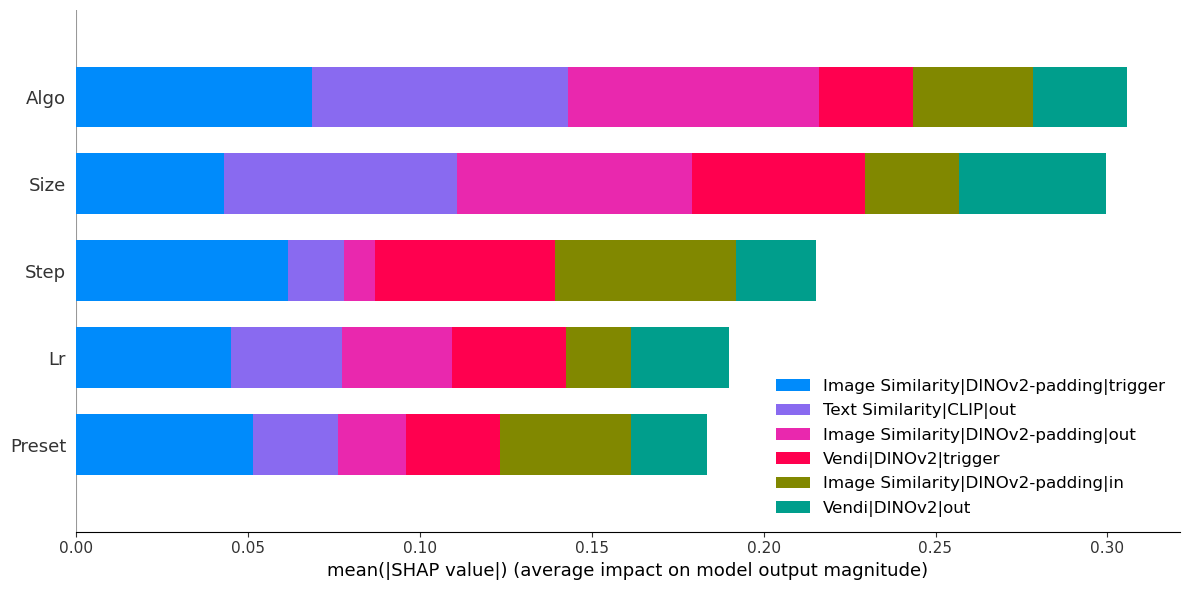

In [578]:
plt.figure(figsize=(20, 12))

shap.summary_plot(
    shap_values_list,
    analysis.X_for_plot,
    plot_type="bar",
    class_names=['|'.join(parts) for parts in metrics_to_include],
    feature_names=analysis.X_for_plot.columns,
    plot_size=(12, 6),
    show=False)
plt.savefig(
    f"figures/feature_importance/{category}_{metric}_shap_feature_importance.png"
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


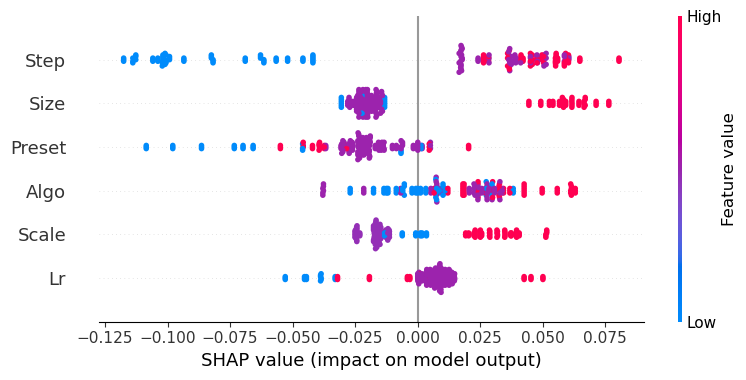

In [468]:
explainer = shap.TreeExplainer(analysis.model)
shap_values = explainer.shap_values(analysis.X_new)
shap.summary_plot(shap_values,
                  analysis.transform_X_for_plot(analysis.X_new),
                  show=False)
plt.savefig("figures/feature_importance/people_shap_with_scale.png")

In [240]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

##### grid search

In [257]:
train_dataset = Pool(X_train, y_train, cat_features=['Algo', 'Preset'])

grid = {
    'iterations': [100, 150, 200],
    'learning_rate': [0.03, 0.1],
    'depth': [2, 4, 6, 8],
    'l2_leaf_reg': [0.2, 0.5, 1, 3]
}
# Perform grid search
grid_search_result = model.grid_search(grid, train_dataset)

# Extract and print the best hyperparameters
best_params = grid_search_result['params']

0:	learn: 0.5425105	test: 0.4673707	best: 0.4673707 (0)	total: 368us	remaining: 36.5ms
1:	learn: 0.5278856	test: 0.4528119	best: 0.4528119 (1)	total: 625us	remaining: 30.7ms
2:	learn: 0.5139758	test: 0.4390284	best: 0.4390284 (2)	total: 874us	remaining: 28.3ms
3:	learn: 0.5003875	test: 0.4257927	best: 0.4257927 (3)	total: 1.12ms	remaining: 26.8ms
4:	learn: 0.4873219	test: 0.4127285	best: 0.4127285 (4)	total: 1.32ms	remaining: 25.1ms
5:	learn: 0.4745004	test: 0.4002616	best: 0.4002616 (5)	total: 1.51ms	remaining: 23.7ms
6:	learn: 0.4622389	test: 0.3885577	best: 0.3885577 (6)	total: 1.72ms	remaining: 22.9ms
7:	learn: 0.4504062	test: 0.3766981	best: 0.3766981 (7)	total: 1.91ms	remaining: 22ms
8:	learn: 0.4390567	test: 0.3656352	best: 0.3656352 (8)	total: 2.12ms	remaining: 21.4ms
9:	learn: 0.4281394	test: 0.3552496	best: 0.3552496 (9)	total: 2.32ms	remaining: 20.8ms
10:	learn: 0.4173837	test: 0.3450275	best: 0.3450275 (10)	total: 2.51ms	remaining: 20.3ms
11:	learn: 0.4071601	test: 0.335207

68:	learn: 0.1745523	test: 0.1666288	best: 0.1663331 (66)	total: 8.72ms	remaining: 10.2ms
69:	learn: 0.1732004	test: 0.1666137	best: 0.1663331 (66)	total: 9.5ms	remaining: 10.9ms
70:	learn: 0.1722763	test: 0.1664724	best: 0.1663331 (66)	total: 9.75ms	remaining: 10.8ms
71:	learn: 0.1712042	test: 0.1664688	best: 0.1663331 (66)	total: 10.5ms	remaining: 11.4ms
72:	learn: 0.1703373	test: 0.1668036	best: 0.1663331 (66)	total: 11ms	remaining: 11.6ms
73:	learn: 0.1697083	test: 0.1670967	best: 0.1663331 (66)	total: 11.2ms	remaining: 11.6ms
74:	learn: 0.1687650	test: 0.1671485	best: 0.1663331 (66)	total: 11.7ms	remaining: 11.7ms
75:	learn: 0.1680932	test: 0.1671601	best: 0.1663331 (66)	total: 12.1ms	remaining: 11.8ms
76:	learn: 0.1673742	test: 0.1670864	best: 0.1663331 (66)	total: 12.5ms	remaining: 11.8ms
77:	learn: 0.1668115	test: 0.1672092	best: 0.1663331 (66)	total: 12.8ms	remaining: 11.8ms
78:	learn: 0.1663259	test: 0.1674432	best: 0.1663331 (66)	total: 13.1ms	remaining: 11.7ms
79:	learn: 0.

71:	learn: 0.1358678	test: 0.1730842	best: 0.1652337 (21)	total: 10.4ms	remaining: 18.4ms
72:	learn: 0.1356390	test: 0.1726090	best: 0.1652337 (21)	total: 10.6ms	remaining: 18.5ms
73:	learn: 0.1354329	test: 0.1726783	best: 0.1652337 (21)	total: 11.1ms	remaining: 18.9ms
74:	learn: 0.1353270	test: 0.1729613	best: 0.1652337 (21)	total: 11.9ms	remaining: 19.9ms
75:	learn: 0.1347719	test: 0.1724537	best: 0.1652337 (21)	total: 12.3ms	remaining: 20.1ms
76:	learn: 0.1343978	test: 0.1722342	best: 0.1652337 (21)	total: 12.8ms	remaining: 20.4ms
77:	learn: 0.1342933	test: 0.1724028	best: 0.1652337 (21)	total: 13ms	remaining: 20.4ms
78:	learn: 0.1342857	test: 0.1723707	best: 0.1652337 (21)	total: 13.5ms	remaining: 20.7ms
79:	learn: 0.1340339	test: 0.1724054	best: 0.1652337 (21)	total: 13.9ms	remaining: 20.8ms
80:	learn: 0.1334691	test: 0.1718711	best: 0.1652337 (21)	total: 14.3ms	remaining: 21.1ms
81:	learn: 0.1328825	test: 0.1714254	best: 0.1652337 (21)	total: 14.7ms	remaining: 21.1ms
82:	learn: 0

159:	learn: 0.1257541	test: 0.1702830	best: 0.1671594 (21)	total: 47.7ms	remaining: 11.9ms
160:	learn: 0.1256727	test: 0.1703881	best: 0.1671594 (21)	total: 48.5ms	remaining: 11.8ms
161:	learn: 0.1256285	test: 0.1705067	best: 0.1671594 (21)	total: 48.9ms	remaining: 11.5ms
162:	learn: 0.1254318	test: 0.1702987	best: 0.1671594 (21)	total: 49.4ms	remaining: 11.2ms
163:	learn: 0.1252312	test: 0.1703948	best: 0.1671594 (21)	total: 49.9ms	remaining: 11ms
164:	learn: 0.1250427	test: 0.1703124	best: 0.1671594 (21)	total: 50.5ms	remaining: 10.7ms
165:	learn: 0.1250257	test: 0.1704470	best: 0.1671594 (21)	total: 51.2ms	remaining: 10.5ms
166:	learn: 0.1249171	test: 0.1703071	best: 0.1671594 (21)	total: 51.6ms	remaining: 10.2ms
167:	learn: 0.1247440	test: 0.1703740	best: 0.1671594 (21)	total: 51.9ms	remaining: 9.88ms
168:	learn: 0.1247109	test: 0.1704884	best: 0.1671594 (21)	total: 52.4ms	remaining: 9.61ms
169:	learn: 0.1246312	test: 0.1704691	best: 0.1671594 (21)	total: 52.8ms	remaining: 9.32ms
1

97:	learn: 0.1073606	test: 0.1717600	best: 0.1661536 (19)	total: 36.2ms	remaining: 739us
98:	learn: 0.1070962	test: 0.1715999	best: 0.1661536 (19)	total: 36.7ms	remaining: 370us
99:	learn: 0.1067350	test: 0.1713617	best: 0.1661536 (19)	total: 37.3ms	remaining: 0us

bestTest = 0.1661535979
bestIteration = 19

27:	loss: 0.1661536	best: 0.1612712 (24)	total: 858ms	remaining: 2.08s
0:	learn: 0.5431240	test: 0.4688437	best: 0.4688437 (0)	total: 1.07ms	remaining: 106ms
1:	learn: 0.5289939	test: 0.4547768	best: 0.4547768 (1)	total: 1.7ms	remaining: 83.3ms
2:	learn: 0.5156080	test: 0.4419300	best: 0.4419300 (2)	total: 2.27ms	remaining: 73.4ms
3:	learn: 0.5023431	test: 0.4298266	best: 0.4298266 (3)	total: 2.73ms	remaining: 65.5ms
4:	learn: 0.4897288	test: 0.4174531	best: 0.4174531 (4)	total: 3.37ms	remaining: 64ms
5:	learn: 0.4771577	test: 0.4051468	best: 0.4051468 (5)	total: 3.53ms	remaining: 55.4ms
6:	learn: 0.4649557	test: 0.3932710	best: 0.3932710 (6)	total: 3.97ms	remaining: 52.7ms
7:	lear

95:	learn: 0.1452791	test: 0.1642899	best: 0.1612712 (69)	total: 39.3ms	remaining: 22.1ms
96:	learn: 0.1448764	test: 0.1641467	best: 0.1612712 (69)	total: 40.3ms	remaining: 22ms
97:	learn: 0.1442740	test: 0.1639375	best: 0.1612712 (69)	total: 41.5ms	remaining: 22ms
98:	learn: 0.1438935	test: 0.1641950	best: 0.1612712 (69)	total: 42.1ms	remaining: 21.7ms
99:	learn: 0.1437489	test: 0.1644381	best: 0.1612712 (69)	total: 42.3ms	remaining: 21.2ms
100:	learn: 0.1433394	test: 0.1650616	best: 0.1612712 (69)	total: 42.9ms	remaining: 20.8ms
101:	learn: 0.1429048	test: 0.1649480	best: 0.1612712 (69)	total: 43.4ms	remaining: 20.4ms
102:	learn: 0.1425701	test: 0.1650153	best: 0.1612712 (69)	total: 44.1ms	remaining: 20.1ms
103:	learn: 0.1422468	test: 0.1650633	best: 0.1612712 (69)	total: 44.8ms	remaining: 19.8ms
104:	learn: 0.1418889	test: 0.1651613	best: 0.1612712 (69)	total: 45.2ms	remaining: 19.4ms
105:	learn: 0.1415215	test: 0.1653844	best: 0.1612712 (69)	total: 45.8ms	remaining: 19ms
106:	learn

88:	learn: 0.1584619	test: 0.1685146	best: 0.1670151 (76)	total: 15.8ms	remaining: 10.9ms
89:	learn: 0.1577367	test: 0.1684677	best: 0.1670151 (76)	total: 16.6ms	remaining: 11.1ms
90:	learn: 0.1573487	test: 0.1687717	best: 0.1670151 (76)	total: 16.7ms	remaining: 10.8ms
91:	learn: 0.1565987	test: 0.1686831	best: 0.1670151 (76)	total: 17.3ms	remaining: 10.9ms
92:	learn: 0.1559158	test: 0.1689224	best: 0.1670151 (76)	total: 18.2ms	remaining: 11.2ms
93:	learn: 0.1555763	test: 0.1692390	best: 0.1670151 (76)	total: 18.6ms	remaining: 11.1ms
94:	learn: 0.1552711	test: 0.1695567	best: 0.1670151 (76)	total: 18.9ms	remaining: 10.9ms
95:	learn: 0.1547935	test: 0.1697638	best: 0.1670151 (76)	total: 19.5ms	remaining: 11ms
96:	learn: 0.1543565	test: 0.1696883	best: 0.1670151 (76)	total: 20.4ms	remaining: 11.1ms
97:	learn: 0.1540854	test: 0.1699876	best: 0.1670151 (76)	total: 20.6ms	remaining: 10.9ms
98:	learn: 0.1538296	test: 0.1702846	best: 0.1670151 (76)	total: 20.8ms	remaining: 10.7ms
99:	learn: 0

191:	learn: 0.0817500	test: 0.1837375	best: 0.1653792 (21)	total: 69.6ms	remaining: 2.9ms
192:	learn: 0.0815843	test: 0.1842342	best: 0.1653792 (21)	total: 70.2ms	remaining: 2.54ms
193:	learn: 0.0813744	test: 0.1844640	best: 0.1653792 (21)	total: 70.8ms	remaining: 2.19ms
194:	learn: 0.0810867	test: 0.1854465	best: 0.1653792 (21)	total: 71.4ms	remaining: 1.83ms
195:	learn: 0.0807851	test: 0.1868290	best: 0.1653792 (21)	total: 72.1ms	remaining: 1.47ms
196:	learn: 0.0805822	test: 0.1870630	best: 0.1653792 (21)	total: 73.1ms	remaining: 1.11ms
197:	learn: 0.0805020	test: 0.1870775	best: 0.1653792 (21)	total: 74.1ms	remaining: 748us
198:	learn: 0.0804228	test: 0.1870296	best: 0.1653792 (21)	total: 75ms	remaining: 376us
199:	learn: 0.0802864	test: 0.1871474	best: 0.1653792 (21)	total: 75.8ms	remaining: 0us

bestTest = 0.1653792014
bestIteration = 21

41:	loss: 0.1653792	best: 0.1612712 (24)	total: 1.46s	remaining: 1.88s
0:	learn: 0.5427702	test: 0.4675097	best: 0.4675097 (0)	total: 1.94ms	rem

108:	learn: 0.1034395	test: 0.1735368	best: 0.1689418 (72)	total: 25.1ms	remaining: 20.9ms
109:	learn: 0.1034139	test: 0.1733402	best: 0.1689418 (72)	total: 26ms	remaining: 21.2ms
110:	learn: 0.1033412	test: 0.1732923	best: 0.1689418 (72)	total: 26.9ms	remaining: 21.6ms
111:	learn: 0.1029305	test: 0.1734527	best: 0.1689418 (72)	total: 27.5ms	remaining: 21.6ms
112:	learn: 0.1027988	test: 0.1735551	best: 0.1689418 (72)	total: 27.9ms	remaining: 21.5ms
113:	learn: 0.1026325	test: 0.1734242	best: 0.1689418 (72)	total: 28.2ms	remaining: 21.3ms
114:	learn: 0.1024548	test: 0.1737390	best: 0.1689418 (72)	total: 28.4ms	remaining: 21ms
115:	learn: 0.1024149	test: 0.1736981	best: 0.1689418 (72)	total: 28.7ms	remaining: 20.8ms
116:	learn: 0.1019662	test: 0.1734155	best: 0.1689418 (72)	total: 28.9ms	remaining: 20.5ms
117:	learn: 0.1019024	test: 0.1731968	best: 0.1689418 (72)	total: 29.2ms	remaining: 20.3ms
118:	learn: 0.1014666	test: 0.1743767	best: 0.1689418 (72)	total: 29.4ms	remaining: 20ms
119:	

48:	loss: 0.1627526	best: 0.1607254 (47)	total: 1.86s	remaining: 1.78s
0:	learn: 0.5080415	test: 0.4352632	best: 0.4352632 (0)	total: 1.04ms	remaining: 103ms
1:	learn: 0.4634001	test: 0.3908336	best: 0.3908336 (1)	total: 1.27ms	remaining: 62.3ms
2:	learn: 0.4233086	test: 0.3526727	best: 0.3526727 (2)	total: 2.46ms	remaining: 79.5ms
3:	learn: 0.3871911	test: 0.3197298	best: 0.3197298 (3)	total: 4.52ms	remaining: 109ms
4:	learn: 0.3558295	test: 0.2920262	best: 0.2920262 (4)	total: 5ms	remaining: 95.1ms
5:	learn: 0.3282342	test: 0.2667663	best: 0.2667663 (5)	total: 5.31ms	remaining: 83.2ms
6:	learn: 0.3033776	test: 0.2460234	best: 0.2460234 (6)	total: 6.16ms	remaining: 81.9ms
7:	learn: 0.2818227	test: 0.2279849	best: 0.2279849 (7)	total: 6.83ms	remaining: 78.6ms
8:	learn: 0.2614246	test: 0.2128041	best: 0.2128041 (8)	total: 7.69ms	remaining: 77.7ms
9:	learn: 0.2434963	test: 0.2018183	best: 0.2018183 (9)	total: 8.62ms	remaining: 77.6ms
10:	learn: 0.2285720	test: 0.1910533	best: 0.1910533 (

34:	learn: 0.2690692	test: 0.2225390	best: 0.2225390 (34)	total: 25.2ms	remaining: 46.9ms
35:	learn: 0.2647295	test: 0.2189661	best: 0.2189661 (35)	total: 26.6ms	remaining: 47.3ms
36:	learn: 0.2603463	test: 0.2156582	best: 0.2156582 (36)	total: 27.7ms	remaining: 47.2ms
37:	learn: 0.2561315	test: 0.2122771	best: 0.2122771 (37)	total: 28.7ms	remaining: 46.8ms
38:	learn: 0.2519709	test: 0.2092406	best: 0.2092406 (38)	total: 29.9ms	remaining: 46.7ms
39:	learn: 0.2484766	test: 0.2069399	best: 0.2069399 (39)	total: 30.6ms	remaining: 45.9ms
40:	learn: 0.2444856	test: 0.2041578	best: 0.2041578 (40)	total: 31.1ms	remaining: 44.7ms
41:	learn: 0.2405495	test: 0.2014030	best: 0.2014030 (41)	total: 31.6ms	remaining: 43.6ms
42:	learn: 0.2368272	test: 0.1990585	best: 0.1990585 (42)	total: 32.3ms	remaining: 42.8ms
43:	learn: 0.2332808	test: 0.1969620	best: 0.1969620 (43)	total: 33.3ms	remaining: 42.4ms
44:	learn: 0.2299387	test: 0.1948254	best: 0.1948254 (44)	total: 34.1ms	remaining: 41.7ms
45:	learn:

92:	learn: 0.0806025	test: 0.1826997	best: 0.1640174 (19)	total: 56.7ms	remaining: 34.7ms
93:	learn: 0.0805909	test: 0.1826755	best: 0.1640174 (19)	total: 57.8ms	remaining: 34.4ms
94:	learn: 0.0802233	test: 0.1827033	best: 0.1640174 (19)	total: 59.2ms	remaining: 34.3ms
95:	learn: 0.0791865	test: 0.1827345	best: 0.1640174 (19)	total: 60ms	remaining: 33.8ms
96:	learn: 0.0790393	test: 0.1825222	best: 0.1640174 (19)	total: 61.2ms	remaining: 33.5ms
97:	learn: 0.0781464	test: 0.1834935	best: 0.1640174 (19)	total: 62.3ms	remaining: 33.1ms
98:	learn: 0.0778929	test: 0.1836658	best: 0.1640174 (19)	total: 63.6ms	remaining: 32.8ms
99:	learn: 0.0774149	test: 0.1845350	best: 0.1640174 (19)	total: 64.6ms	remaining: 32.3ms
100:	learn: 0.0771107	test: 0.1852752	best: 0.1640174 (19)	total: 65.4ms	remaining: 31.7ms
101:	learn: 0.0765323	test: 0.1855148	best: 0.1640174 (19)	total: 66.4ms	remaining: 31.2ms
102:	learn: 0.0757369	test: 0.1860868	best: 0.1640174 (19)	total: 67.6ms	remaining: 30.9ms
103:	lear

38:	learn: 0.1221556	test: 0.1734515	best: 0.1624516 (21)	total: 31ms	remaining: 88.3ms
39:	learn: 0.1203518	test: 0.1737296	best: 0.1624516 (21)	total: 32.2ms	remaining: 88.7ms
40:	learn: 0.1193859	test: 0.1740875	best: 0.1624516 (21)	total: 33.2ms	remaining: 88.3ms
41:	learn: 0.1186697	test: 0.1759530	best: 0.1624516 (21)	total: 34.4ms	remaining: 88.5ms
42:	learn: 0.1176344	test: 0.1761874	best: 0.1624516 (21)	total: 35.2ms	remaining: 87.7ms
43:	learn: 0.1171477	test: 0.1762723	best: 0.1624516 (21)	total: 36.2ms	remaining: 87.1ms
44:	learn: 0.1171155	test: 0.1765404	best: 0.1624516 (21)	total: 36.6ms	remaining: 85.5ms
45:	learn: 0.1162379	test: 0.1762854	best: 0.1624516 (21)	total: 37.3ms	remaining: 84.2ms
46:	learn: 0.1155717	test: 0.1761547	best: 0.1624516 (21)	total: 38.2ms	remaining: 83.8ms
47:	learn: 0.1150632	test: 0.1764200	best: 0.1624516 (21)	total: 38.8ms	remaining: 82.5ms
48:	learn: 0.1147332	test: 0.1768205	best: 0.1624516 (21)	total: 39.5ms	remaining: 81.5ms
49:	learn: 0

17:	learn: 0.1714046	test: 0.1674914	best: 0.1674914 (17)	total: 15.2ms	remaining: 112ms
18:	learn: 0.1661938	test: 0.1668528	best: 0.1668528 (18)	total: 16.4ms	remaining: 113ms
19:	learn: 0.1619169	test: 0.1662118	best: 0.1662118 (19)	total: 17.5ms	remaining: 114ms
20:	learn: 0.1584281	test: 0.1663680	best: 0.1662118 (19)	total: 18ms	remaining: 110ms
21:	learn: 0.1542503	test: 0.1651399	best: 0.1651399 (21)	total: 18.6ms	remaining: 108ms
22:	learn: 0.1516516	test: 0.1664739	best: 0.1651399 (21)	total: 18.7ms	remaining: 103ms
23:	learn: 0.1484368	test: 0.1666435	best: 0.1651399 (21)	total: 19.2ms	remaining: 101ms
24:	learn: 0.1458928	test: 0.1663505	best: 0.1651399 (21)	total: 20.6ms	remaining: 103ms
25:	learn: 0.1438544	test: 0.1670015	best: 0.1651399 (21)	total: 21.7ms	remaining: 104ms
26:	learn: 0.1424060	test: 0.1676345	best: 0.1651399 (21)	total: 22.5ms	remaining: 103ms
27:	learn: 0.1409138	test: 0.1687010	best: 0.1651399 (21)	total: 22.9ms	remaining: 99.9ms
28:	learn: 0.1401055	t

162:	learn: 0.1098011	test: 0.1725304	best: 0.1620892 (62)	total: 57.6ms	remaining: 13.1ms
163:	learn: 0.1093855	test: 0.1725657	best: 0.1620892 (62)	total: 58.7ms	remaining: 12.9ms
164:	learn: 0.1091234	test: 0.1727330	best: 0.1620892 (62)	total: 60.1ms	remaining: 12.7ms
165:	learn: 0.1091092	test: 0.1728003	best: 0.1620892 (62)	total: 60.3ms	remaining: 12.4ms
166:	learn: 0.1089719	test: 0.1729133	best: 0.1620892 (62)	total: 61.6ms	remaining: 12.2ms
167:	learn: 0.1085582	test: 0.1727311	best: 0.1620892 (62)	total: 62.7ms	remaining: 11.9ms
168:	learn: 0.1079985	test: 0.1726399	best: 0.1620892 (62)	total: 63.9ms	remaining: 11.7ms
169:	learn: 0.1077263	test: 0.1728467	best: 0.1620892 (62)	total: 65ms	remaining: 11.5ms
170:	learn: 0.1072896	test: 0.1729641	best: 0.1620892 (62)	total: 65.6ms	remaining: 11.1ms
171:	learn: 0.1071269	test: 0.1736170	best: 0.1620892 (62)	total: 66.7ms	remaining: 10.9ms
172:	learn: 0.1069408	test: 0.1735253	best: 0.1620892 (62)	total: 67.6ms	remaining: 10.6ms
1

71:	learn: 0.1610163	test: 0.1640467	best: 0.1640467 (71)	total: 21.3ms	remaining: 37.8ms
72:	learn: 0.1603050	test: 0.1643231	best: 0.1640467 (71)	total: 21.6ms	remaining: 37.6ms
73:	learn: 0.1586082	test: 0.1640649	best: 0.1640467 (71)	total: 22.4ms	remaining: 38.1ms
74:	learn: 0.1576788	test: 0.1644712	best: 0.1640467 (71)	total: 23.5ms	remaining: 39.1ms
75:	learn: 0.1570703	test: 0.1647721	best: 0.1640467 (71)	total: 23.6ms	remaining: 38.5ms
76:	learn: 0.1561904	test: 0.1648746	best: 0.1640467 (71)	total: 24.3ms	remaining: 38.8ms
77:	learn: 0.1547599	test: 0.1649637	best: 0.1640467 (71)	total: 25.5ms	remaining: 39.9ms
78:	learn: 0.1535559	test: 0.1644779	best: 0.1640467 (71)	total: 26.3ms	remaining: 40.3ms
79:	learn: 0.1529552	test: 0.1648980	best: 0.1640467 (71)	total: 26.8ms	remaining: 40.1ms
80:	learn: 0.1521165	test: 0.1651123	best: 0.1640467 (71)	total: 28ms	remaining: 41.1ms
81:	learn: 0.1510092	test: 0.1650360	best: 0.1640467 (71)	total: 28.9ms	remaining: 41.5ms
82:	learn: 0

67:	learn: 0.1659482	test: 0.1647193	best: 0.1647193 (67)	total: 41.2ms	remaining: 80ms
68:	learn: 0.1649512	test: 0.1648457	best: 0.1647193 (67)	total: 41.6ms	remaining: 78.9ms
69:	learn: 0.1639610	test: 0.1648223	best: 0.1647193 (67)	total: 42.7ms	remaining: 79.2ms
70:	learn: 0.1625485	test: 0.1646408	best: 0.1646408 (70)	total: 44.1ms	remaining: 80.2ms
71:	learn: 0.1613835	test: 0.1643807	best: 0.1643807 (71)	total: 45.1ms	remaining: 80.1ms
72:	learn: 0.1604347	test: 0.1644757	best: 0.1643807 (71)	total: 45.6ms	remaining: 79.3ms
73:	learn: 0.1588056	test: 0.1641099	best: 0.1641099 (73)	total: 47ms	remaining: 80ms
74:	learn: 0.1580656	test: 0.1643535	best: 0.1641099 (73)	total: 47.3ms	remaining: 78.9ms
75:	learn: 0.1571746	test: 0.1645497	best: 0.1641099 (73)	total: 48ms	remaining: 78.3ms
76:	learn: 0.1560893	test: 0.1645938	best: 0.1641099 (73)	total: 48.9ms	remaining: 78.2ms
77:	learn: 0.1554567	test: 0.1648688	best: 0.1641099 (73)	total: 49.1ms	remaining: 76.7ms
78:	learn: 0.15442

199:	learn: 0.0597261	test: 0.1948331	best: 0.1669533 (16)	total: 106ms	remaining: 0us

bestTest = 0.1669532665
bestIteration = 16

69:	loss: 0.1669533	best: 0.1607254 (47)	total: 3.46s	remaining: 1.29s
0:	learn: 0.5437154	test: 0.4688968	best: 0.4688968 (0)	total: 909us	remaining: 181ms
1:	learn: 0.5317118	test: 0.4586102	best: 0.4586102 (1)	total: 2.25ms	remaining: 223ms
2:	learn: 0.5202047	test: 0.4474369	best: 0.4474369 (2)	total: 3.38ms	remaining: 222ms
3:	learn: 0.5084173	test: 0.4372032	best: 0.4372032 (3)	total: 4.25ms	remaining: 208ms
4:	learn: 0.4957580	test: 0.4252856	best: 0.4252856 (4)	total: 4.72ms	remaining: 184ms
5:	learn: 0.4833493	test: 0.4129495	best: 0.4129495 (5)	total: 5.12ms	remaining: 165ms
6:	learn: 0.4712190	test: 0.4012219	best: 0.4012219 (6)	total: 5.31ms	remaining: 146ms
7:	learn: 0.4604360	test: 0.3906002	best: 0.3906002 (7)	total: 6.06ms	remaining: 145ms
8:	learn: 0.4490547	test: 0.3796607	best: 0.3796607 (8)	total: 6.16ms	remaining: 131ms
9:	learn: 0.438

70:	learn: 0.1554525	test: 0.1647657	best: 0.1627650 (59)	total: 21.5ms	remaining: 8.77ms
71:	learn: 0.1545344	test: 0.1648563	best: 0.1627650 (59)	total: 22.7ms	remaining: 8.82ms
72:	learn: 0.1537984	test: 0.1650876	best: 0.1627650 (59)	total: 23.3ms	remaining: 8.6ms
73:	learn: 0.1530332	test: 0.1651764	best: 0.1627650 (59)	total: 24ms	remaining: 8.42ms
74:	learn: 0.1515421	test: 0.1650774	best: 0.1627650 (59)	total: 25.1ms	remaining: 8.35ms
75:	learn: 0.1508331	test: 0.1653570	best: 0.1627650 (59)	total: 25.5ms	remaining: 8.06ms
76:	learn: 0.1502256	test: 0.1655632	best: 0.1627650 (59)	total: 25.9ms	remaining: 7.72ms
77:	learn: 0.1492949	test: 0.1653942	best: 0.1627650 (59)	total: 26.6ms	remaining: 7.51ms
78:	learn: 0.1483200	test: 0.1654598	best: 0.1627650 (59)	total: 27.6ms	remaining: 7.34ms
79:	learn: 0.1477627	test: 0.1656899	best: 0.1627650 (59)	total: 27.8ms	remaining: 6.95ms
80:	learn: 0.1463928	test: 0.1655035	best: 0.1627650 (59)	total: 28.9ms	remaining: 6.77ms
81:	learn: 0.

66:	learn: 0.1645011	test: 0.1648221	best: 0.1648221 (66)	total: 18.9ms	remaining: 9.33ms
67:	learn: 0.1632700	test: 0.1646601	best: 0.1646601 (67)	total: 19.5ms	remaining: 9.16ms
68:	learn: 0.1617591	test: 0.1641434	best: 0.1641434 (68)	total: 20.9ms	remaining: 9.39ms
69:	learn: 0.1602291	test: 0.1642318	best: 0.1641434 (68)	total: 22.3ms	remaining: 9.55ms
70:	learn: 0.1592462	test: 0.1643968	best: 0.1641434 (68)	total: 22.6ms	remaining: 9.21ms
71:	learn: 0.1583285	test: 0.1645328	best: 0.1641434 (68)	total: 22.6ms	remaining: 8.81ms
72:	learn: 0.1572507	test: 0.1644232	best: 0.1641434 (68)	total: 23.4ms	remaining: 8.65ms
73:	learn: 0.1556930	test: 0.1651935	best: 0.1641434 (68)	total: 24.5ms	remaining: 8.62ms
74:	learn: 0.1545784	test: 0.1647463	best: 0.1641434 (68)	total: 25.6ms	remaining: 8.54ms
75:	learn: 0.1535101	test: 0.1646336	best: 0.1641434 (68)	total: 26.5ms	remaining: 8.36ms
76:	learn: 0.1521982	test: 0.1643939	best: 0.1641434 (68)	total: 27.7ms	remaining: 8.27ms
77:	learn:

40:	learn: 0.1081200	test: 0.1785150	best: 0.1617025 (19)	total: 13.3ms	remaining: 35.3ms
41:	learn: 0.1080604	test: 0.1787915	best: 0.1617025 (19)	total: 13.8ms	remaining: 35.6ms
42:	learn: 0.1054984	test: 0.1791706	best: 0.1617025 (19)	total: 15.2ms	remaining: 37.9ms
43:	learn: 0.1049464	test: 0.1807479	best: 0.1617025 (19)	total: 16.8ms	remaining: 40.5ms
44:	learn: 0.1016326	test: 0.1829355	best: 0.1617025 (19)	total: 18ms	remaining: 42ms
45:	learn: 0.0986136	test: 0.1848881	best: 0.1617025 (19)	total: 19.1ms	remaining: 43.3ms
46:	learn: 0.0965055	test: 0.1866043	best: 0.1617025 (19)	total: 20.4ms	remaining: 44.7ms
47:	learn: 0.0944760	test: 0.1877803	best: 0.1617025 (19)	total: 21.6ms	remaining: 45.9ms
48:	learn: 0.0925646	test: 0.1878357	best: 0.1617025 (19)	total: 22.8ms	remaining: 46.9ms
49:	learn: 0.0908954	test: 0.1882320	best: 0.1617025 (19)	total: 24.2ms	remaining: 48.4ms
50:	learn: 0.0903421	test: 0.1883262	best: 0.1617025 (19)	total: 25.6ms	remaining: 49.7ms
51:	learn: 0.0

140:	learn: 0.0562697	test: 0.1890408	best: 0.1663069 (17)	total: 83.7ms	remaining: 5.34ms
141:	learn: 0.0560973	test: 0.1891618	best: 0.1663069 (17)	total: 85.8ms	remaining: 4.83ms
142:	learn: 0.0551636	test: 0.1888573	best: 0.1663069 (17)	total: 87.4ms	remaining: 4.28ms
143:	learn: 0.0543919	test: 0.1888732	best: 0.1663069 (17)	total: 89.1ms	remaining: 3.71ms
144:	learn: 0.0540951	test: 0.1892416	best: 0.1663069 (17)	total: 90.5ms	remaining: 3.12ms
145:	learn: 0.0539615	test: 0.1889983	best: 0.1663069 (17)	total: 92ms	remaining: 2.52ms
146:	learn: 0.0535871	test: 0.1892795	best: 0.1663069 (17)	total: 92.7ms	remaining: 1.89ms
147:	learn: 0.0535484	test: 0.1894885	best: 0.1663069 (17)	total: 94.2ms	remaining: 1.27ms
148:	learn: 0.0534450	test: 0.1896198	best: 0.1663069 (17)	total: 96ms	remaining: 644us
149:	learn: 0.0532273	test: 0.1898422	best: 0.1663069 (17)	total: 97.5ms	remaining: 0us

bestTest = 0.1663068538
bestIteration = 17

83:	loss: 0.1663069	best: 0.1600520 (70)	total: 4.28s

77:	learn: 0.1662175	test: 0.1727446	best: 0.1727446 (77)	total: 37.8ms	remaining: 34.9ms
78:	learn: 0.1653057	test: 0.1728652	best: 0.1727446 (77)	total: 38.2ms	remaining: 34.3ms
79:	learn: 0.1642478	test: 0.1726794	best: 0.1726794 (79)	total: 39.8ms	remaining: 34.8ms
80:	learn: 0.1634405	test: 0.1726347	best: 0.1726347 (80)	total: 41.1ms	remaining: 35ms
81:	learn: 0.1626479	test: 0.1728049	best: 0.1726347 (80)	total: 41.2ms	remaining: 34.1ms
82:	learn: 0.1615555	test: 0.1729784	best: 0.1726347 (80)	total: 41.7ms	remaining: 33.6ms
83:	learn: 0.1606796	test: 0.1727989	best: 0.1726347 (80)	total: 42ms	remaining: 33ms
84:	learn: 0.1597653	test: 0.1725809	best: 0.1725809 (84)	total: 43.2ms	remaining: 33.1ms
85:	learn: 0.1586963	test: 0.1722316	best: 0.1722316 (85)	total: 45.1ms	remaining: 33.6ms
86:	learn: 0.1579781	test: 0.1722237	best: 0.1722237 (86)	total: 46.1ms	remaining: 33.4ms
87:	learn: 0.1572634	test: 0.1721063	best: 0.1721063 (87)	total: 47ms	remaining: 33.1ms
88:	learn: 0.15663

136:	learn: 0.0750492	test: 0.1913776	best: 0.1722675 (24)	total: 129ms	remaining: 12.2ms
137:	learn: 0.0749750	test: 0.1913249	best: 0.1722675 (24)	total: 130ms	remaining: 11.3ms
138:	learn: 0.0746781	test: 0.1910740	best: 0.1722675 (24)	total: 131ms	remaining: 10.3ms
139:	learn: 0.0739490	test: 0.1914449	best: 0.1722675 (24)	total: 131ms	remaining: 9.38ms
140:	learn: 0.0736466	test: 0.1913381	best: 0.1722675 (24)	total: 133ms	remaining: 8.48ms
141:	learn: 0.0733374	test: 0.1912052	best: 0.1722675 (24)	total: 134ms	remaining: 7.57ms
142:	learn: 0.0732317	test: 0.1910889	best: 0.1722675 (24)	total: 136ms	remaining: 6.63ms
143:	learn: 0.0731699	test: 0.1910229	best: 0.1722675 (24)	total: 137ms	remaining: 5.71ms
144:	learn: 0.0727683	test: 0.1912441	best: 0.1722675 (24)	total: 138ms	remaining: 4.76ms
145:	learn: 0.0722880	test: 0.1911484	best: 0.1722675 (24)	total: 140ms	remaining: 3.84ms
146:	learn: 0.0720316	test: 0.1913966	best: 0.1722675 (24)	total: 142ms	remaining: 2.89ms
147:	learn

177:	learn: 0.0930007	test: 0.1764411	best: 0.1649506 (69)	total: 178ms	remaining: 22ms
178:	learn: 0.0926222	test: 0.1765707	best: 0.1649506 (69)	total: 180ms	remaining: 21.1ms
179:	learn: 0.0920472	test: 0.1766345	best: 0.1649506 (69)	total: 182ms	remaining: 20.2ms
180:	learn: 0.0915760	test: 0.1766456	best: 0.1649506 (69)	total: 184ms	remaining: 19.3ms
181:	learn: 0.0911529	test: 0.1768431	best: 0.1649506 (69)	total: 186ms	remaining: 18.4ms
182:	learn: 0.0908832	test: 0.1768169	best: 0.1649506 (69)	total: 188ms	remaining: 17.4ms
183:	learn: 0.0902872	test: 0.1769808	best: 0.1649506 (69)	total: 189ms	remaining: 16.4ms
184:	learn: 0.0899811	test: 0.1772187	best: 0.1649506 (69)	total: 191ms	remaining: 15.5ms
185:	learn: 0.0895706	test: 0.1772508	best: 0.1649506 (69)	total: 194ms	remaining: 14.6ms
186:	learn: 0.0890188	test: 0.1772400	best: 0.1649506 (69)	total: 196ms	remaining: 13.6ms
187:	learn: 0.0888293	test: 0.1771559	best: 0.1649506 (69)	total: 198ms	remaining: 12.6ms
188:	learn: 

147:	learn: 0.0405421	test: 0.1955320	best: 0.1675195 (18)	total: 157ms	remaining: 55.1ms
148:	learn: 0.0403669	test: 0.1956208	best: 0.1675195 (18)	total: 159ms	remaining: 54.4ms
149:	learn: 0.0399878	test: 0.1956553	best: 0.1675195 (18)	total: 160ms	remaining: 53.5ms
150:	learn: 0.0394653	test: 0.1954967	best: 0.1675195 (18)	total: 162ms	remaining: 52.7ms
151:	learn: 0.0392435	test: 0.1955789	best: 0.1675195 (18)	total: 164ms	remaining: 51.8ms
152:	learn: 0.0383083	test: 0.1956890	best: 0.1675195 (18)	total: 165ms	remaining: 50.8ms
153:	learn: 0.0379451	test: 0.1958028	best: 0.1675195 (18)	total: 167ms	remaining: 49.9ms
154:	learn: 0.0377309	test: 0.1958558	best: 0.1675195 (18)	total: 168ms	remaining: 48.9ms
155:	learn: 0.0373557	test: 0.1956575	best: 0.1675195 (18)	total: 169ms	remaining: 47.8ms
156:	learn: 0.0370964	test: 0.1955454	best: 0.1675195 (18)	total: 172ms	remaining: 47.2ms
157:	learn: 0.0370791	test: 0.1954945	best: 0.1675195 (18)	total: 173ms	remaining: 46ms
158:	learn: 

99:	learn: 0.1364892	test: 0.1673827	best: 0.1631158 (73)	total: 108ms	remaining: 108ms
100:	learn: 0.1349165	test: 0.1679335	best: 0.1631158 (73)	total: 110ms	remaining: 108ms
101:	learn: 0.1339787	test: 0.1679048	best: 0.1631158 (73)	total: 112ms	remaining: 108ms
102:	learn: 0.1328675	test: 0.1673190	best: 0.1631158 (73)	total: 113ms	remaining: 107ms
103:	learn: 0.1327167	test: 0.1675680	best: 0.1631158 (73)	total: 114ms	remaining: 105ms
104:	learn: 0.1317307	test: 0.1681898	best: 0.1631158 (73)	total: 115ms	remaining: 104ms
105:	learn: 0.1303385	test: 0.1685977	best: 0.1631158 (73)	total: 118ms	remaining: 104ms
106:	learn: 0.1294076	test: 0.1684906	best: 0.1631158 (73)	total: 119ms	remaining: 103ms
107:	learn: 0.1287874	test: 0.1684495	best: 0.1631158 (73)	total: 121ms	remaining: 103ms
108:	learn: 0.1283029	test: 0.1686699	best: 0.1631158 (73)	total: 123ms	remaining: 102ms
109:	learn: 0.1281843	test: 0.1688800	best: 0.1631158 (73)	total: 123ms	remaining: 101ms
110:	learn: 0.1277522	

99:	learn: 0.0611983	test: 0.1908277	best: 0.1673172 (18)	total: 49.2ms	remaining: 49.2ms
100:	learn: 0.0611140	test: 0.1908405	best: 0.1673172 (18)	total: 50.7ms	remaining: 49.7ms
101:	learn: 0.0608284	test: 0.1908677	best: 0.1673172 (18)	total: 52.7ms	remaining: 50.6ms
102:	learn: 0.0602704	test: 0.1906614	best: 0.1673172 (18)	total: 54.1ms	remaining: 50.9ms
103:	learn: 0.0590467	test: 0.1909274	best: 0.1673172 (18)	total: 55.4ms	remaining: 51.1ms
104:	learn: 0.0587244	test: 0.1916212	best: 0.1673172 (18)	total: 56.5ms	remaining: 51.1ms
105:	learn: 0.0583495	test: 0.1917704	best: 0.1673172 (18)	total: 58ms	remaining: 51.5ms
106:	learn: 0.0582339	test: 0.1915146	best: 0.1673172 (18)	total: 59.2ms	remaining: 51.5ms
107:	learn: 0.0576674	test: 0.1915537	best: 0.1673172 (18)	total: 60.4ms	remaining: 51.4ms
108:	learn: 0.0573494	test: 0.1915412	best: 0.1673172 (18)	total: 61.5ms	remaining: 51.3ms
109:	learn: 0.0566742	test: 0.1915687	best: 0.1673172 (18)	total: 62.1ms	remaining: 50.8ms
11

53:	learn: 0.1031893	test: 0.1759494	best: 0.1668050 (20)	total: 27.8ms	remaining: 75.1ms
54:	learn: 0.1013481	test: 0.1763610	best: 0.1668050 (20)	total: 29.1ms	remaining: 76.8ms
55:	learn: 0.1005375	test: 0.1760649	best: 0.1668050 (20)	total: 30.6ms	remaining: 78.7ms
56:	learn: 0.0987537	test: 0.1756026	best: 0.1668050 (20)	total: 32.3ms	remaining: 81.1ms
57:	learn: 0.0976640	test: 0.1754905	best: 0.1668050 (20)	total: 33.5ms	remaining: 82ms
58:	learn: 0.0963707	test: 0.1765793	best: 0.1668050 (20)	total: 34.7ms	remaining: 82.9ms
59:	learn: 0.0946683	test: 0.1770897	best: 0.1668050 (20)	total: 36ms	remaining: 84ms
60:	learn: 0.0936079	test: 0.1757470	best: 0.1668050 (20)	total: 37.6ms	remaining: 85.7ms
61:	learn: 0.0929477	test: 0.1755138	best: 0.1668050 (20)	total: 39.2ms	remaining: 87.2ms
62:	learn: 0.0922613	test: 0.1753793	best: 0.1668050 (20)	total: 40.4ms	remaining: 87.8ms
63:	learn: 0.0909893	test: 0.1764464	best: 0.1668050 (20)	total: 41.7ms	remaining: 88.6ms
64:	learn: 0.090

72:	learn: 0.1708274	test: 0.1629716	best: 0.1629716 (72)	total: 51.9ms	remaining: 90.3ms
73:	learn: 0.1697521	test: 0.1630136	best: 0.1629716 (72)	total: 53.2ms	remaining: 90.6ms
74:	learn: 0.1686873	test: 0.1626860	best: 0.1626860 (74)	total: 53.8ms	remaining: 89.7ms
75:	learn: 0.1675742	test: 0.1624200	best: 0.1624200 (75)	total: 54.3ms	remaining: 88.6ms
76:	learn: 0.1666772	test: 0.1624386	best: 0.1624200 (75)	total: 54.4ms	remaining: 86.9ms
77:	learn: 0.1654325	test: 0.1622078	best: 0.1622078 (77)	total: 55.1ms	remaining: 86.1ms
78:	learn: 0.1641240	test: 0.1620682	best: 0.1620682 (78)	total: 55.6ms	remaining: 85.2ms
79:	learn: 0.1629086	test: 0.1616477	best: 0.1616477 (79)	total: 56.1ms	remaining: 84.2ms
80:	learn: 0.1620648	test: 0.1617264	best: 0.1616477 (79)	total: 56.3ms	remaining: 82.8ms
81:	learn: 0.1609742	test: 0.1613632	best: 0.1613632 (81)	total: 56.9ms	remaining: 81.9ms
82:	learn: 0.1600914	test: 0.1613832	best: 0.1613632 (81)	total: 57.4ms	remaining: 80.9ms
83:	learn:

0:	learn: 0.5235068	test: 0.5426610	best: 0.5426610 (0)	total: 1.01ms	remaining: 202ms
1:	learn: 0.5114900	test: 0.5311756	best: 0.5311756 (1)	total: 2.77ms	remaining: 275ms
2:	learn: 0.5005043	test: 0.5197505	best: 0.5197505 (2)	total: 4.87ms	remaining: 320ms
3:	learn: 0.4896916	test: 0.5106474	best: 0.5106474 (3)	total: 6.5ms	remaining: 319ms
4:	learn: 0.4780463	test: 0.4988958	best: 0.4988958 (4)	total: 6.89ms	remaining: 269ms
5:	learn: 0.4678587	test: 0.4900451	best: 0.4900451 (5)	total: 7.66ms	remaining: 248ms
6:	learn: 0.4566845	test: 0.4790206	best: 0.4790206 (6)	total: 8.18ms	remaining: 226ms
7:	learn: 0.4466847	test: 0.4685491	best: 0.4685491 (7)	total: 8.75ms	remaining: 210ms
8:	learn: 0.4373121	test: 0.4586705	best: 0.4586705 (8)	total: 9.27ms	remaining: 197ms
9:	learn: 0.4277080	test: 0.4482580	best: 0.4482580 (9)	total: 9.46ms	remaining: 180ms
10:	learn: 0.4187555	test: 0.4381453	best: 0.4381453 (10)	total: 9.82ms	remaining: 169ms
11:	learn: 0.4102619	test: 0.4294655	best:

85:	learn: 0.1603470	test: 0.1793841	best: 0.1788362 (81)	total: 24.9ms	remaining: 33ms
86:	learn: 0.1590808	test: 0.1790386	best: 0.1788362 (81)	total: 26.7ms	remaining: 34.7ms
87:	learn: 0.1583449	test: 0.1792471	best: 0.1788362 (81)	total: 28.5ms	remaining: 36.3ms
88:	learn: 0.1578125	test: 0.1795788	best: 0.1788362 (81)	total: 29ms	remaining: 36.1ms
89:	learn: 0.1572612	test: 0.1797124	best: 0.1788362 (81)	total: 29.8ms	remaining: 36.5ms
90:	learn: 0.1564697	test: 0.1798304	best: 0.1788362 (81)	total: 30.9ms	remaining: 37ms
91:	learn: 0.1559115	test: 0.1799544	best: 0.1788362 (81)	total: 31.2ms	remaining: 36.6ms
92:	learn: 0.1553833	test: 0.1800873	best: 0.1788362 (81)	total: 31.7ms	remaining: 36.5ms
93:	learn: 0.1547184	test: 0.1802220	best: 0.1788362 (81)	total: 32.6ms	remaining: 36.7ms
94:	learn: 0.1540549	test: 0.1801726	best: 0.1788362 (81)	total: 33.5ms	remaining: 37ms
95:	learn: 0.1536401	test: 0.1803879	best: 0.1788362 (81)	total: 34ms	remaining: 36.9ms
96:	learn: 0.1529255

In [258]:
best_params

{'depth': 6, 'l2_leaf_reg': 3, 'iterations': 200, 'learning_rate': 0.03}

### Scene

In [629]:
category = 'scene'

analysis = FeatureAnalysis(metrics_per_category[category], keyword=category)

In [630]:
analysis.fit(metrics_to_include, test_size=None)

Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.10
R2: 0.73
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.11
R2: 0.66
Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.10
R2: 0.80
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.07
R2: 0.89
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.09
R2: 0.77
Fitting ('Vendi', 'DINOv2', 'out')
Training performance
RMSE: 0.11
R2: 0.70


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


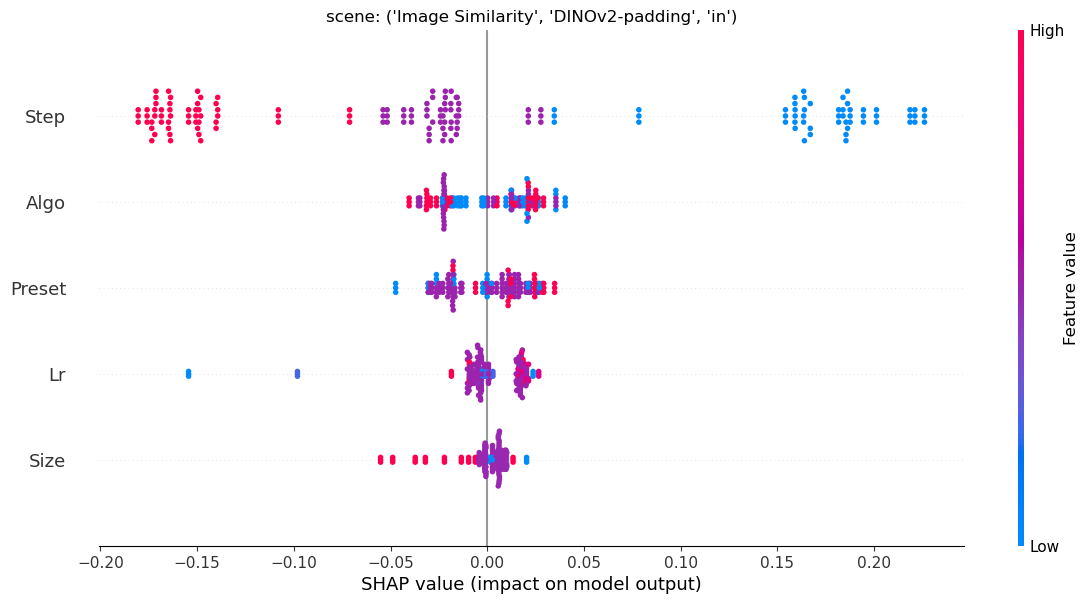

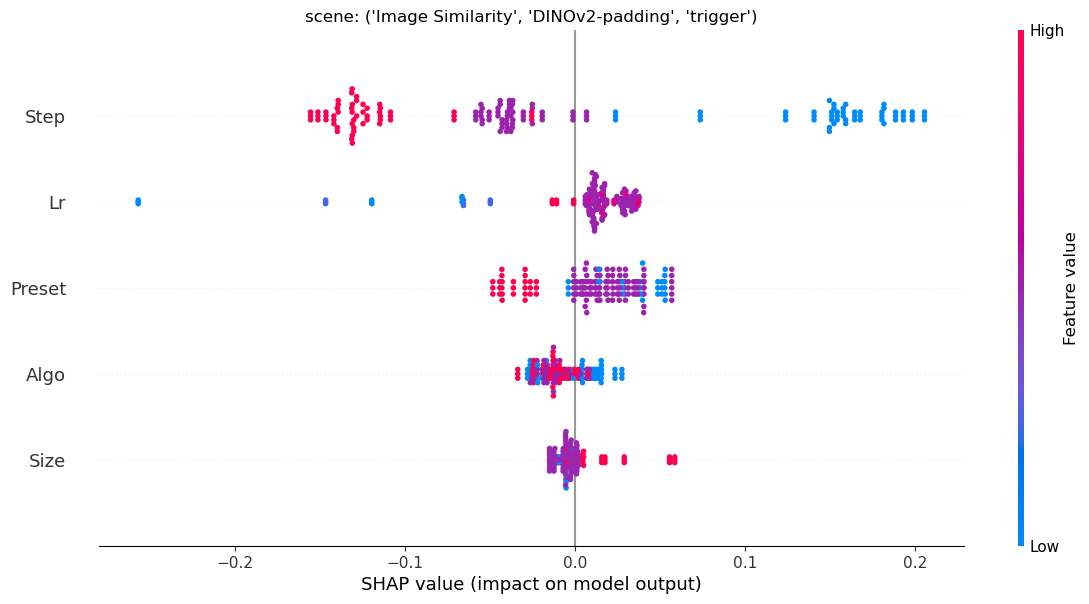

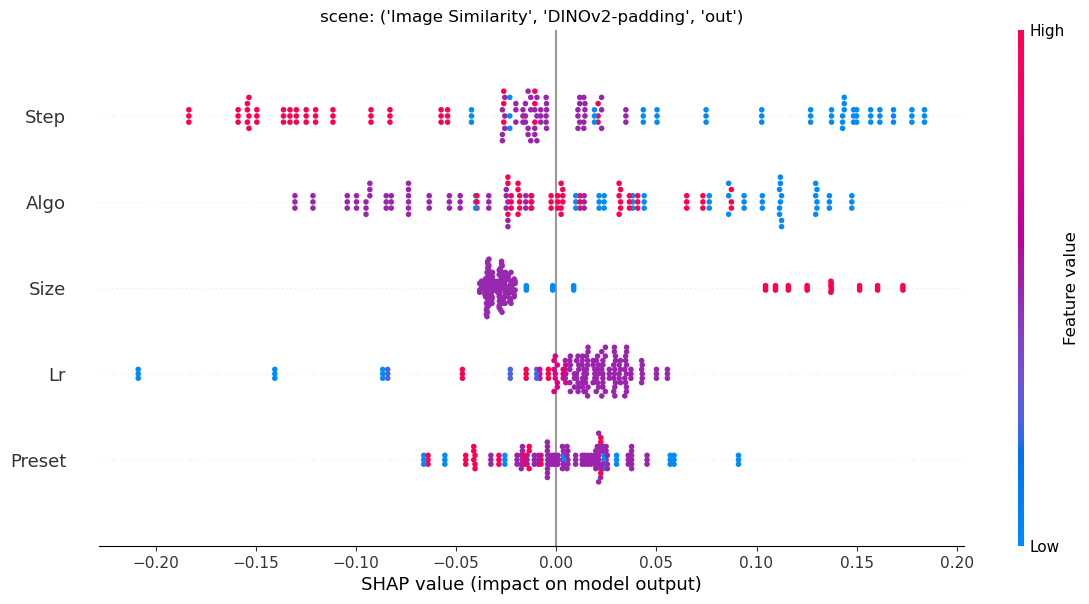

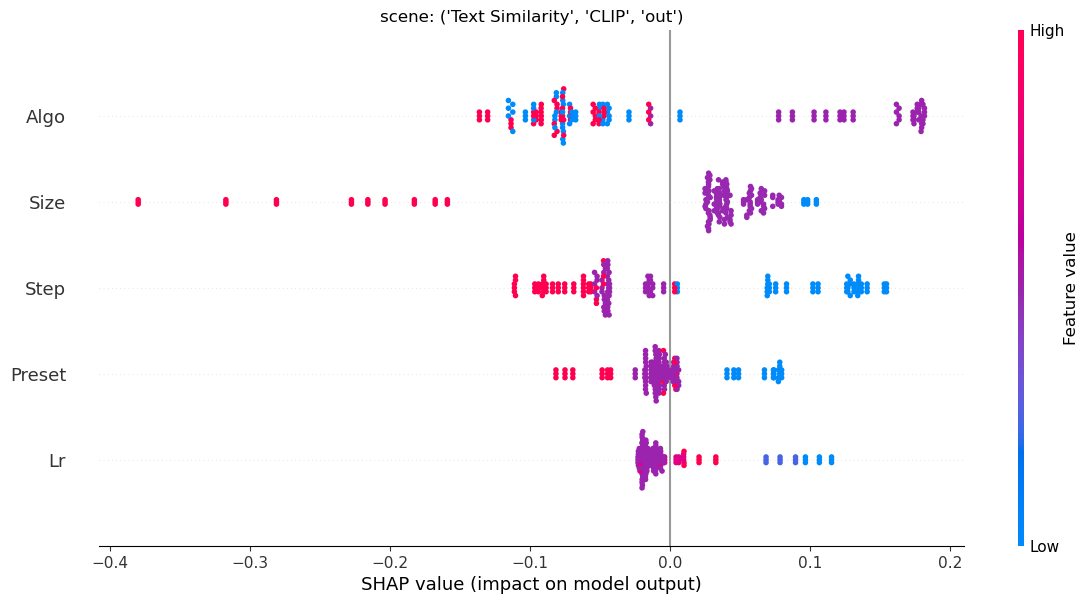

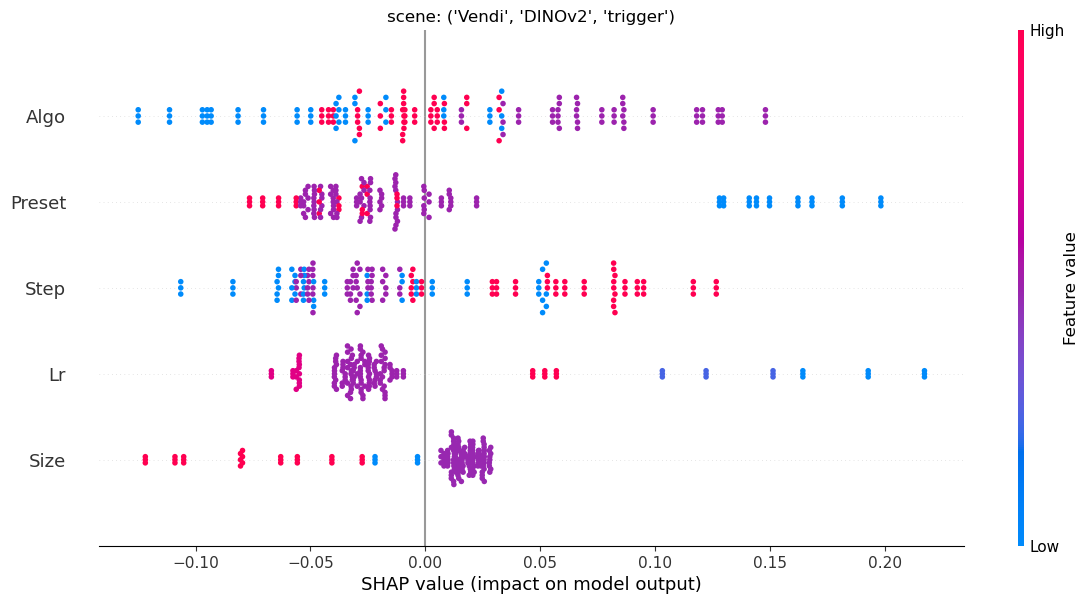

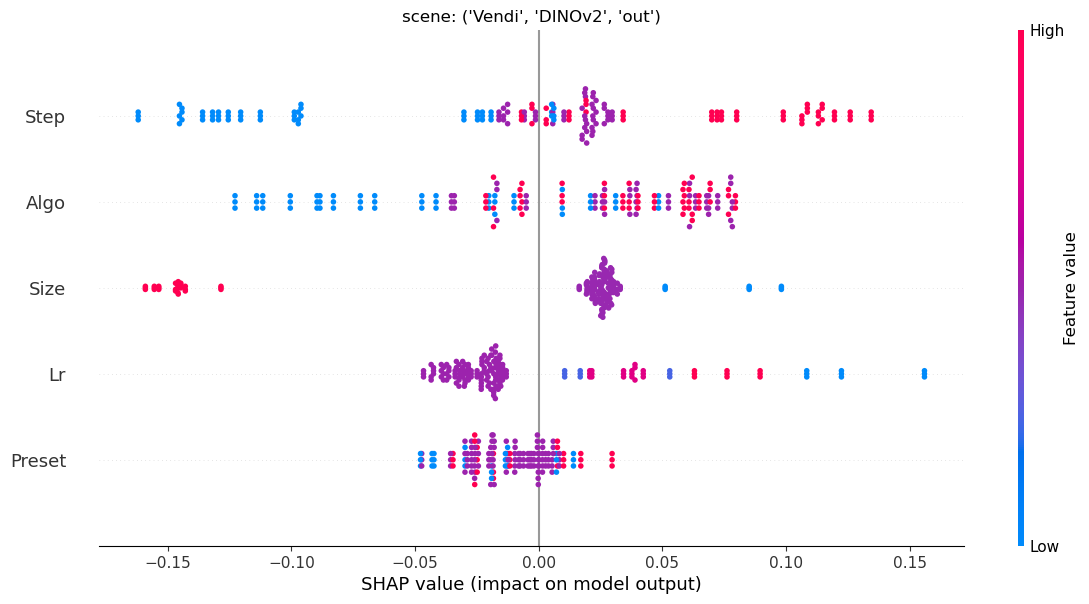

In [631]:
shap_values_list = []

for metric in metrics_to_include:
    plt.figure(figsize=(10, 8))
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      show=False,
                      plot_size=(12, 6))
    shap_values_list.append(shap_values)
    plt.title(f"{category}: {metric}")
    plt.savefig(f"figures/feature_importance/{category}_{metric}_shap.png")

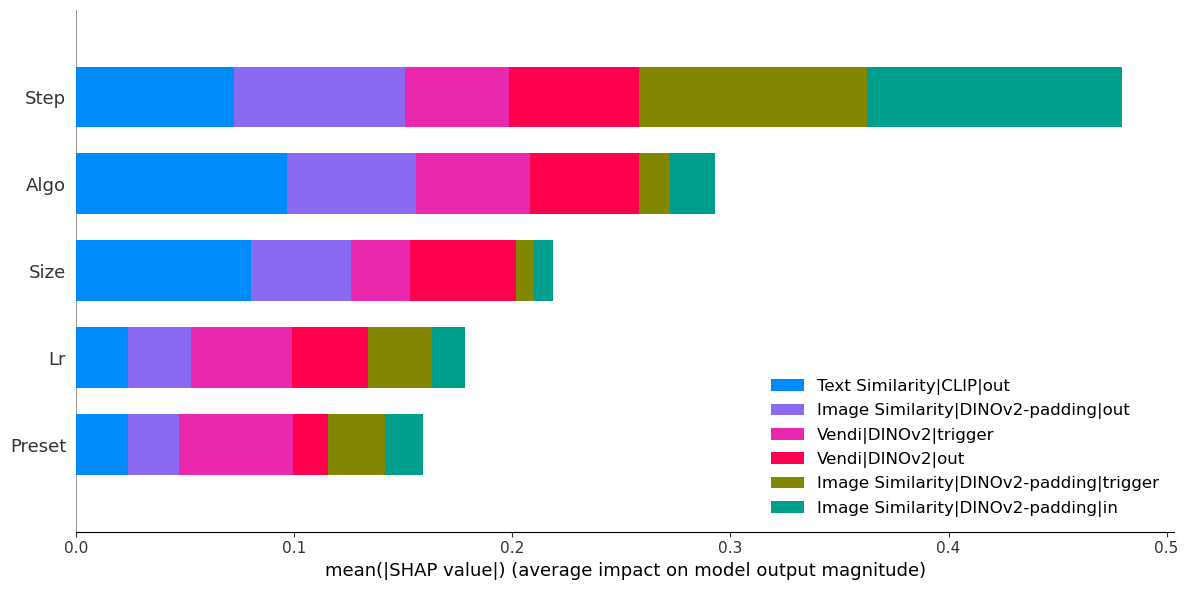

In [584]:
plt.figure(figsize=(20, 12))

shap.summary_plot(
    shap_values_list,
    analysis.X_for_plot,
    plot_type="bar",
    class_names=['|'.join(parts) for parts in metrics_to_include],
    feature_names=analysis.X_for_plot.columns,
    plot_size=(12, 6),
    show=False)
plt.savefig(
    f"figures/feature_importance/{category}_{metric}_shap_feature_importance.png"
)

### Anime

In [632]:
category = 'anime'

analysis = FeatureAnalysis(metrics_per_category[category], keyword=category)

In [633]:
analysis.fit(metrics_to_include, test_size=None)

Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.18
R2: 0.13
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.16
R2: 0.35
Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.16
R2: 0.60
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.18
R2: 0.48
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.15
R2: 0.46
Fitting ('Vendi', 'DINOv2', 'out')
Training performance
RMSE: 0.17
R2: 0.38


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


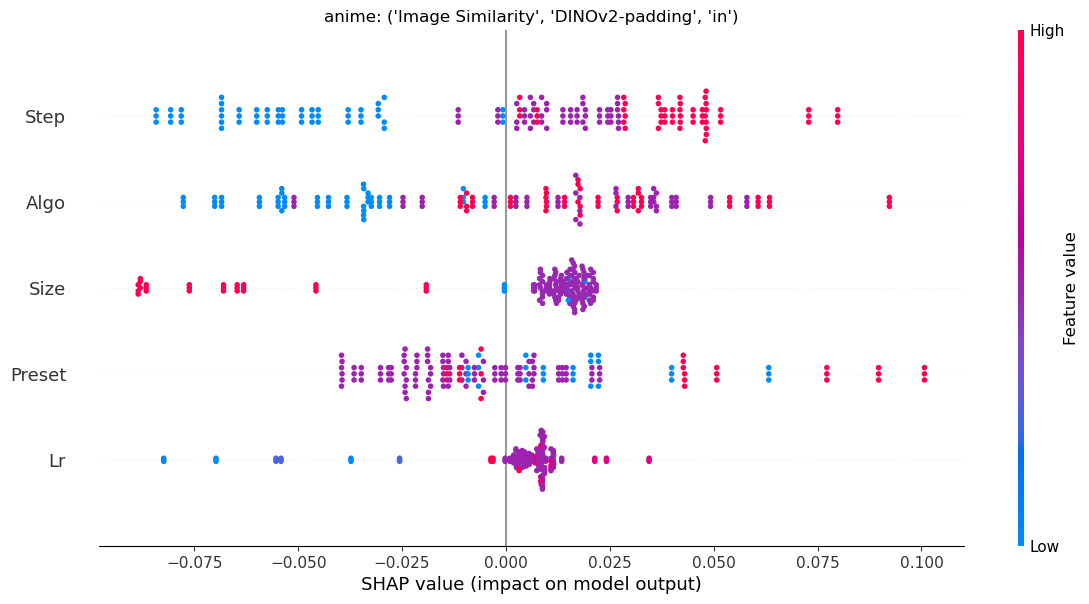

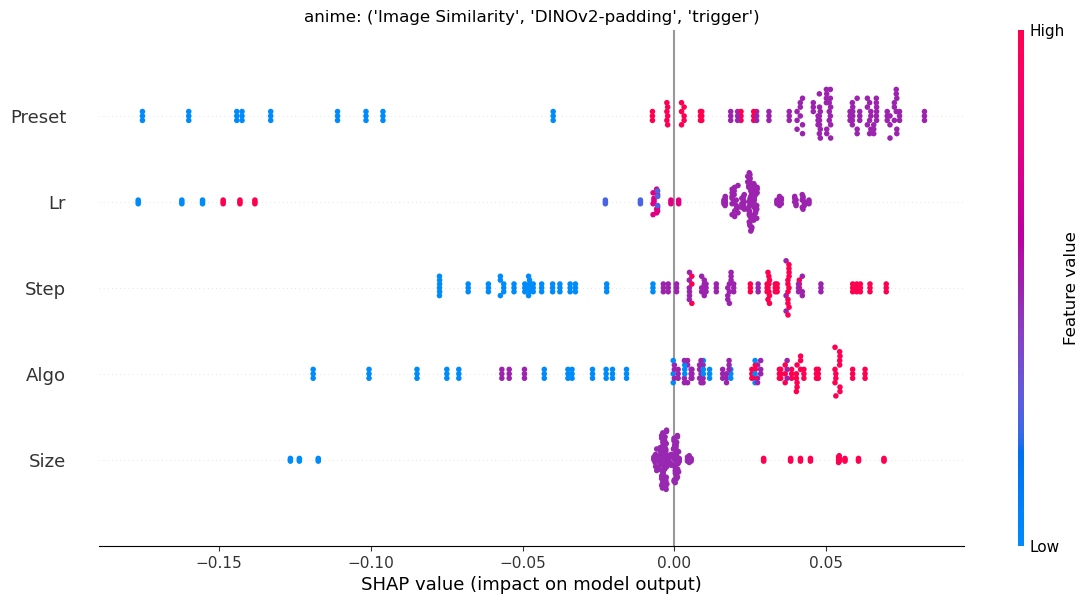

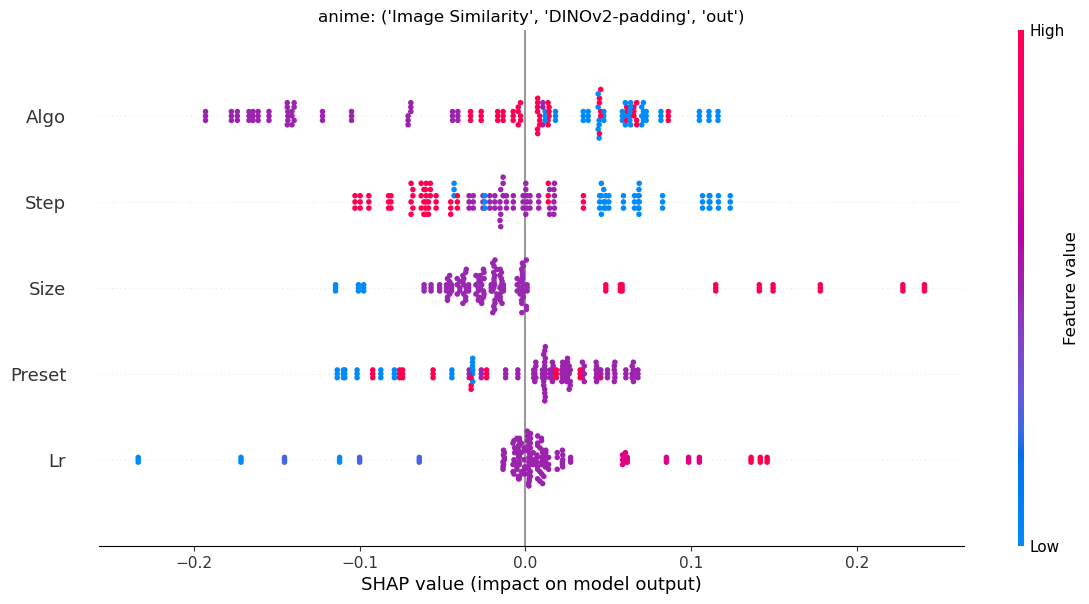

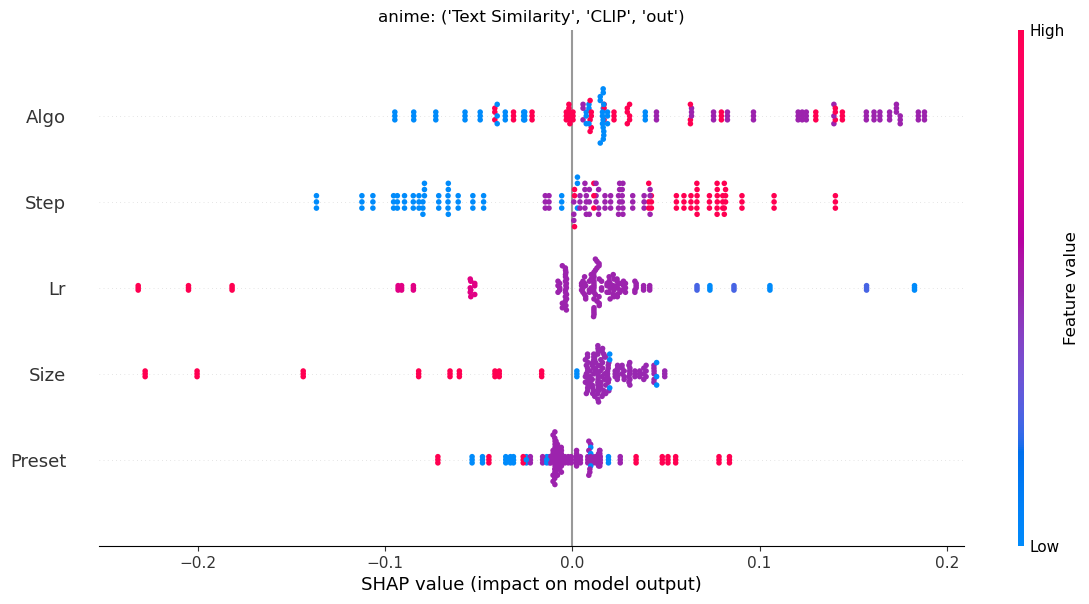

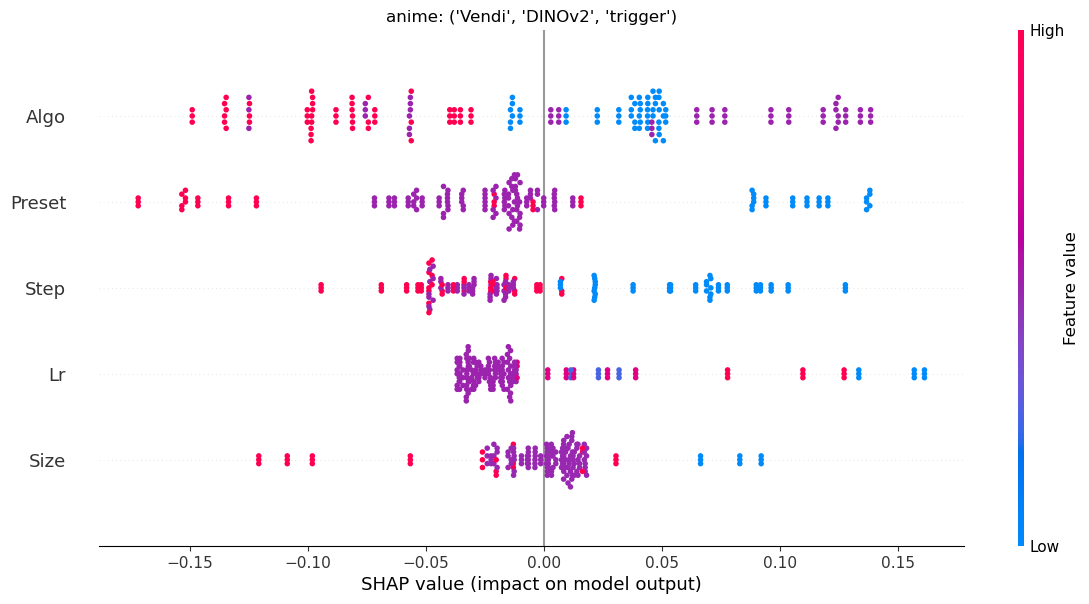

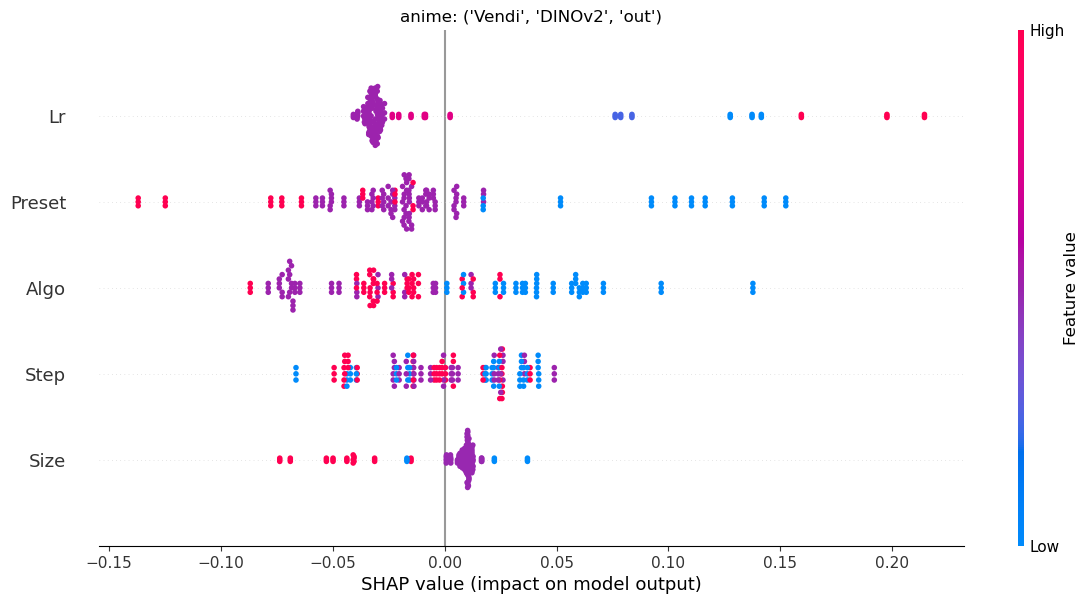

In [634]:
shap_values_list = []

for metric in metrics_to_include:
    plt.figure(figsize=(10, 8))
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      show=False,
                      plot_size=(12, 6))
    shap_values_list.append(shap_values)
    plt.title(f"{category}: {metric}")
    plt.savefig(f"figures/feature_importance/{category}_{metric}_shap.png")

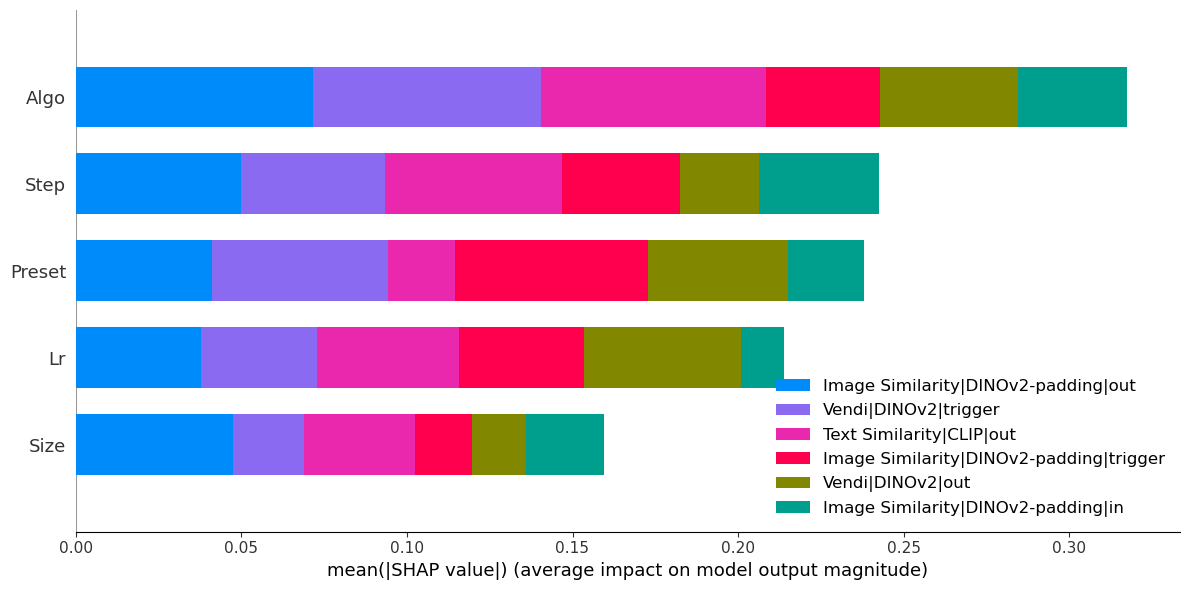

In [588]:
plt.figure(figsize=(20, 12))

shap.summary_plot(
    shap_values_list,
    analysis.X_for_plot,
    plot_type="bar",
    class_names=['|'.join(parts) for parts in metrics_to_include],
    feature_names=analysis.X_for_plot.columns,
    plot_size=(12, 6),
    show=False)
plt.savefig(
    f"figures/feature_importance/{category}_{metric}_shap_feature_importance.png"
)

### Stuffed_toy

In [635]:
category = 'stuffed_toy'

analysis = FeatureAnalysis(metrics_per_category[category], keyword=category)

In [636]:
analysis.fit(metrics_to_include, test_size=None)

Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.09
R2: 0.85
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.10
R2: 0.73
Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.09
R2: 0.81
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.06
R2: 0.94
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.10
R2: 0.63
Fitting ('Vendi', 'DINOv2', 'out')
Training performance
RMSE: 0.11
R2: 0.69


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


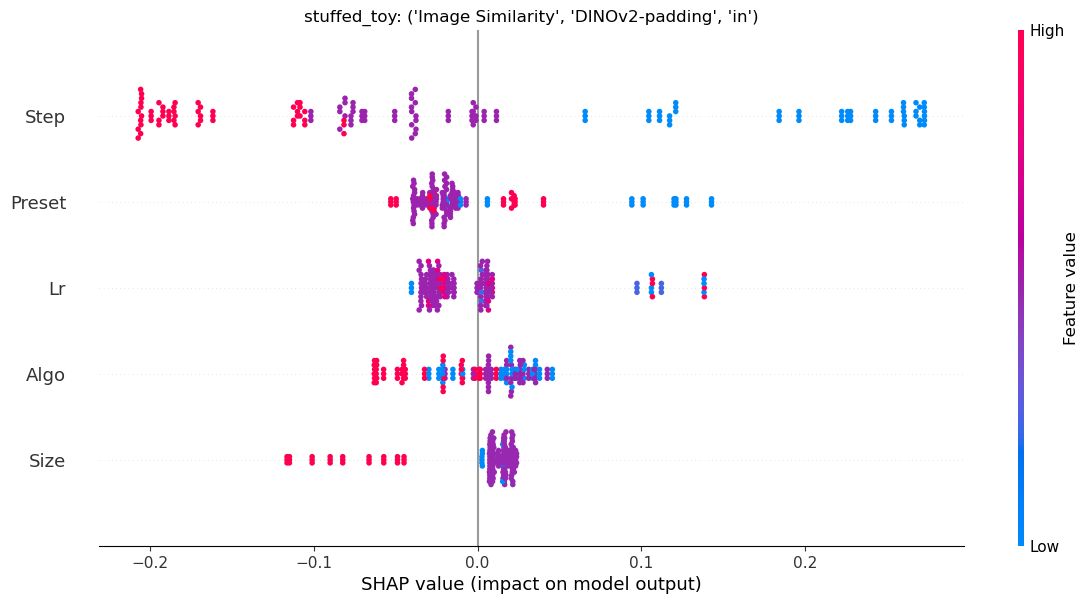

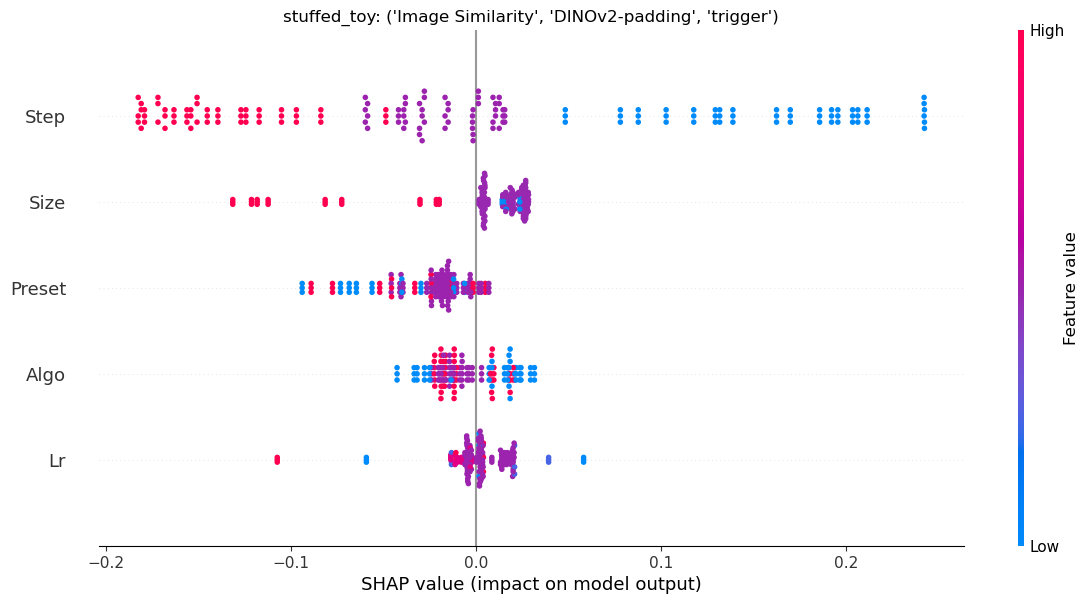

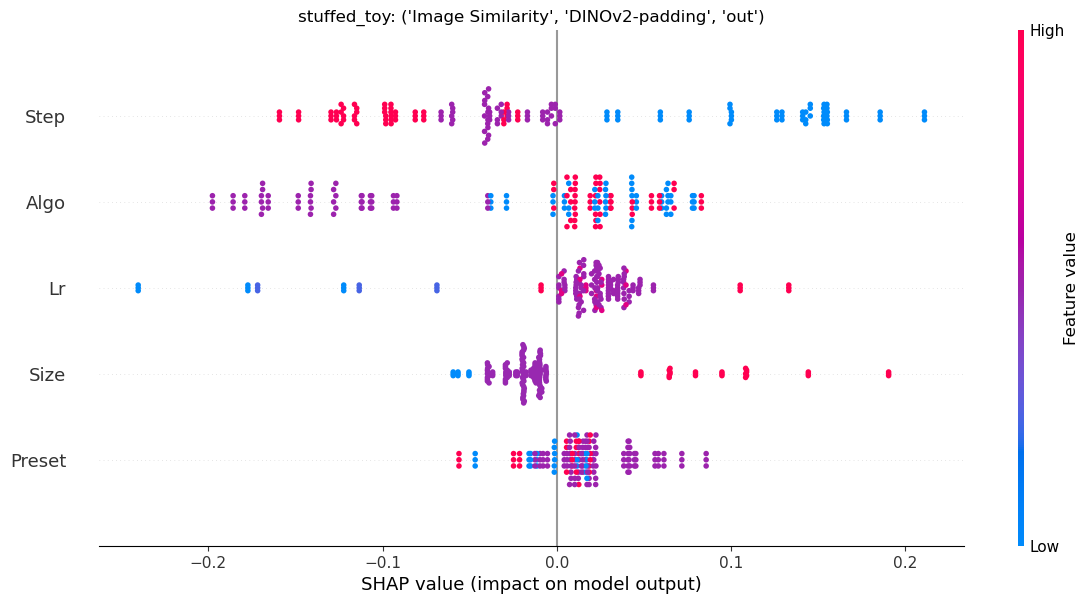

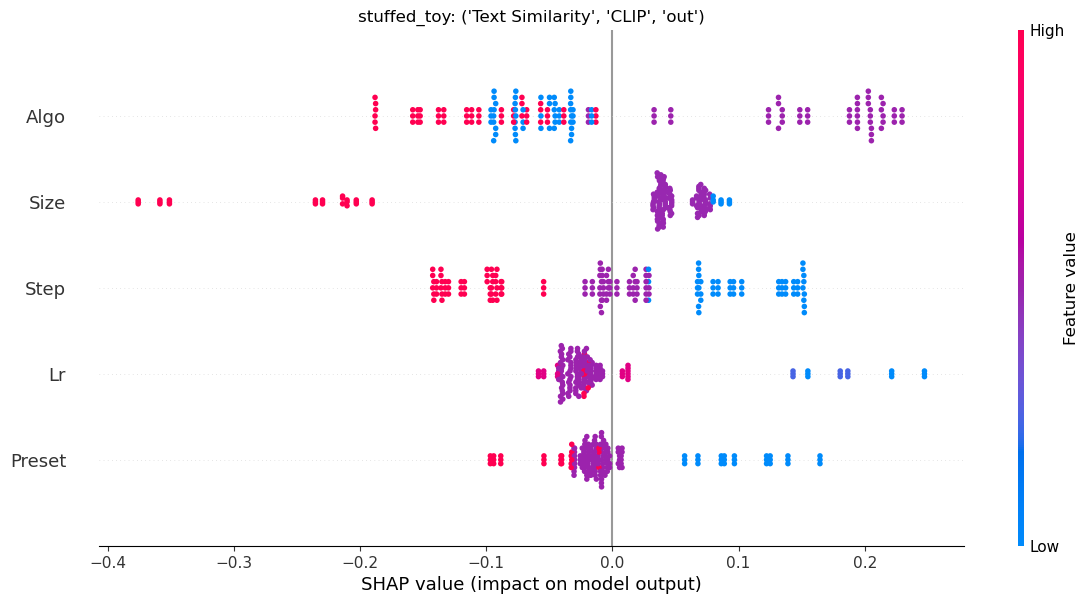

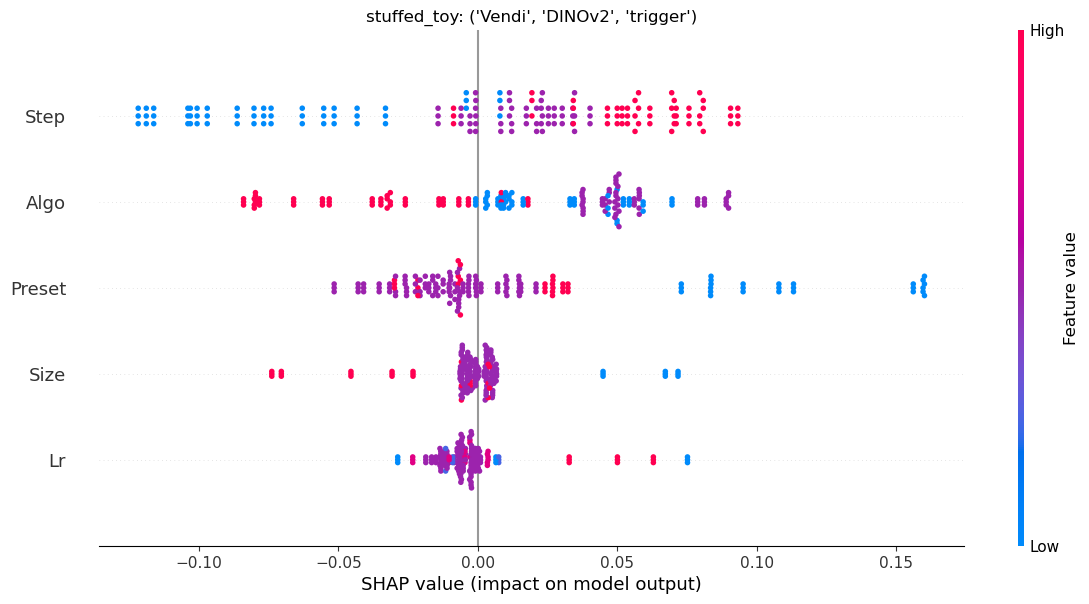

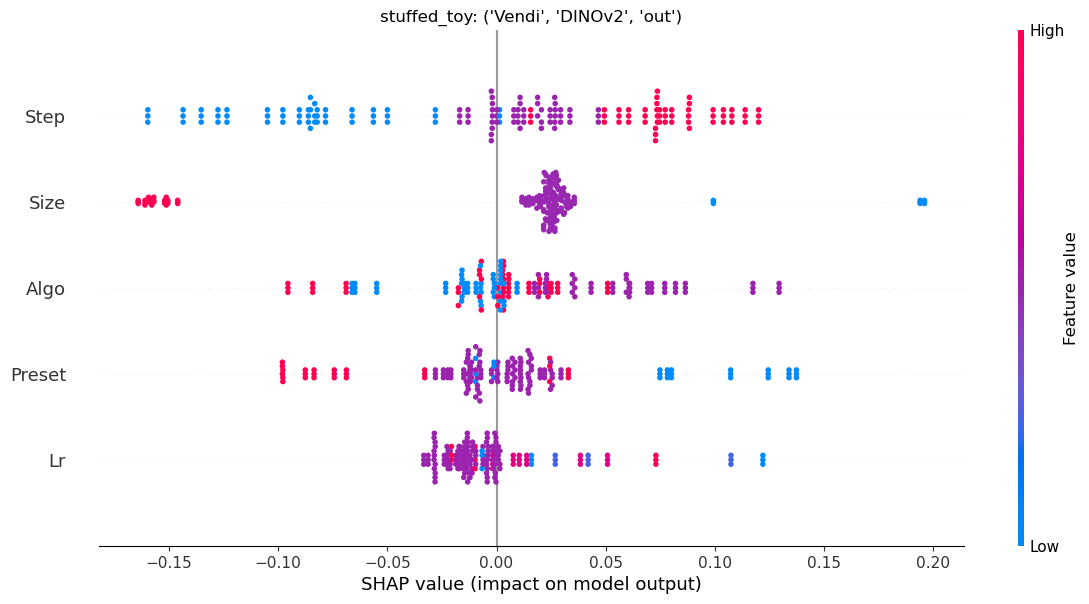

In [637]:
shap_values_list = []

for metric in metrics_to_include:
    plt.figure(figsize=(10, 8))
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      show=False,
                      plot_size=(12, 6))
    shap_values_list.append(shap_values)
    plt.title(f"{category}: {metric}")
    plt.savefig(f"figures/feature_importance/{category}_{metric}_shap.png")

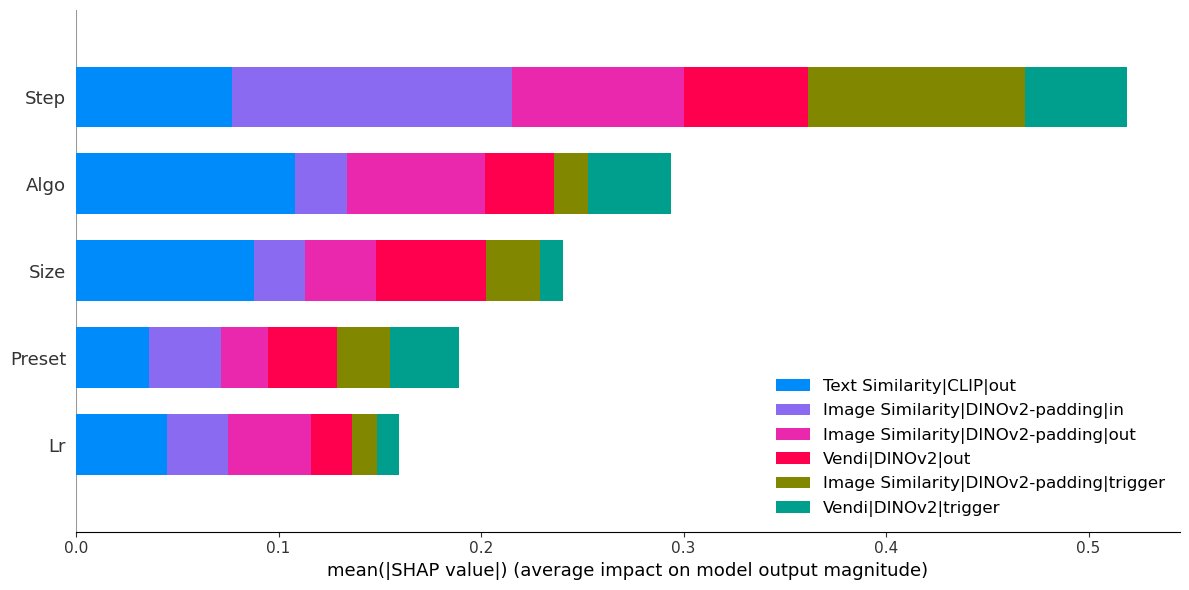

In [603]:
plt.figure(figsize=(20, 12))

shap.summary_plot(
    shap_values_list,
    analysis.X_for_plot,
    plot_type="bar",
    class_names=['|'.join(parts) for parts in metrics_to_include],
    feature_names=analysis.X_for_plot.columns,
    plot_size=(12, 6),
    show=False)
plt.savefig(
    f"figures/feature_importance/{category}_{metric}_shap_feature_importance.png"
)

### Style

In [638]:
category = 'style'

analysis = FeatureAnalysis(metrics_per_category[category], keyword=category)

In [639]:
analysis.fit(metrics_to_include, test_size=None)

Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.11
R2: 0.47
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.11
R2: 0.36
Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.11
R2: 0.59
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.09
R2: 0.88
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.12
R2: 0.35
Fitting ('Vendi', 'DINOv2', 'out')
Training performance
RMSE: 0.11
R2: 0.77


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


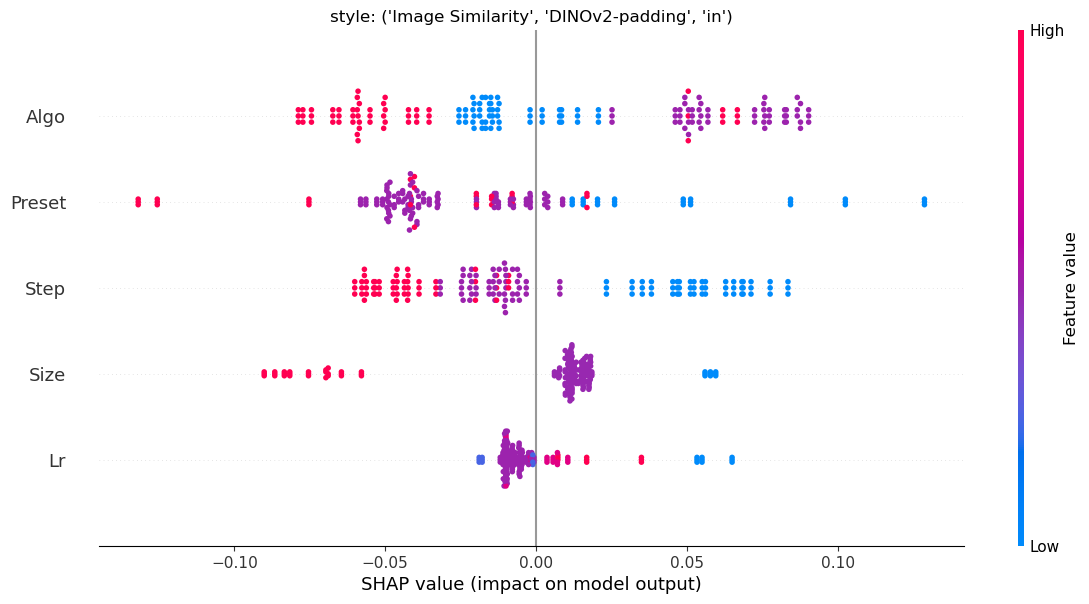

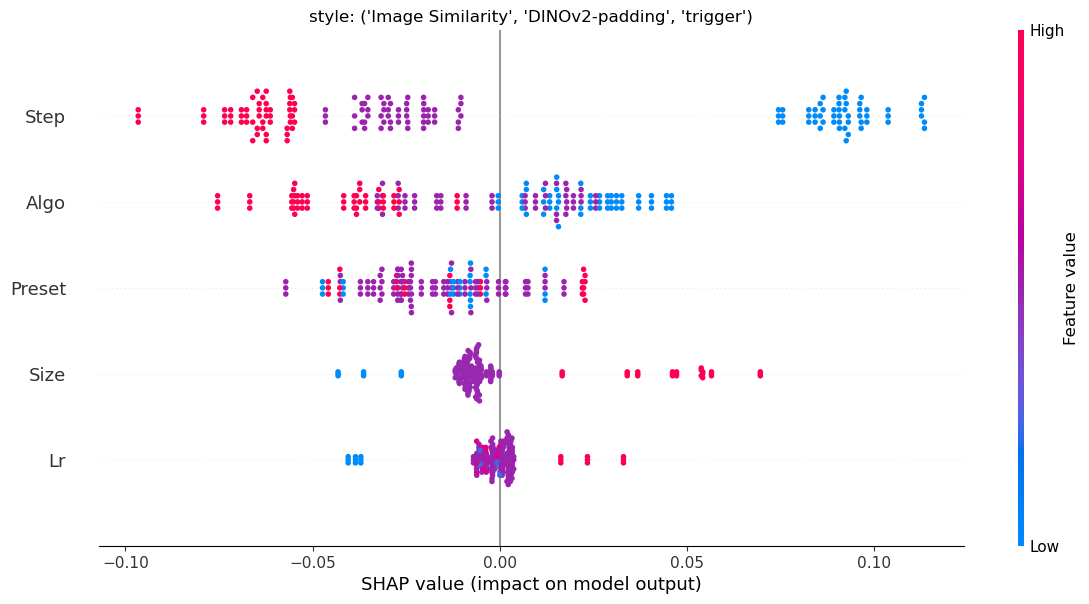

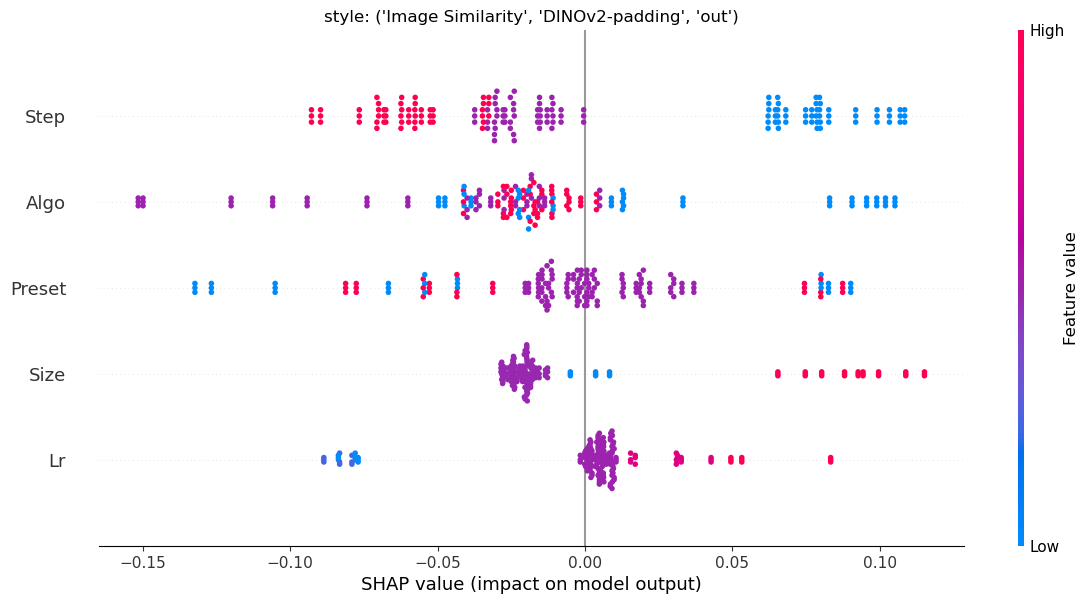

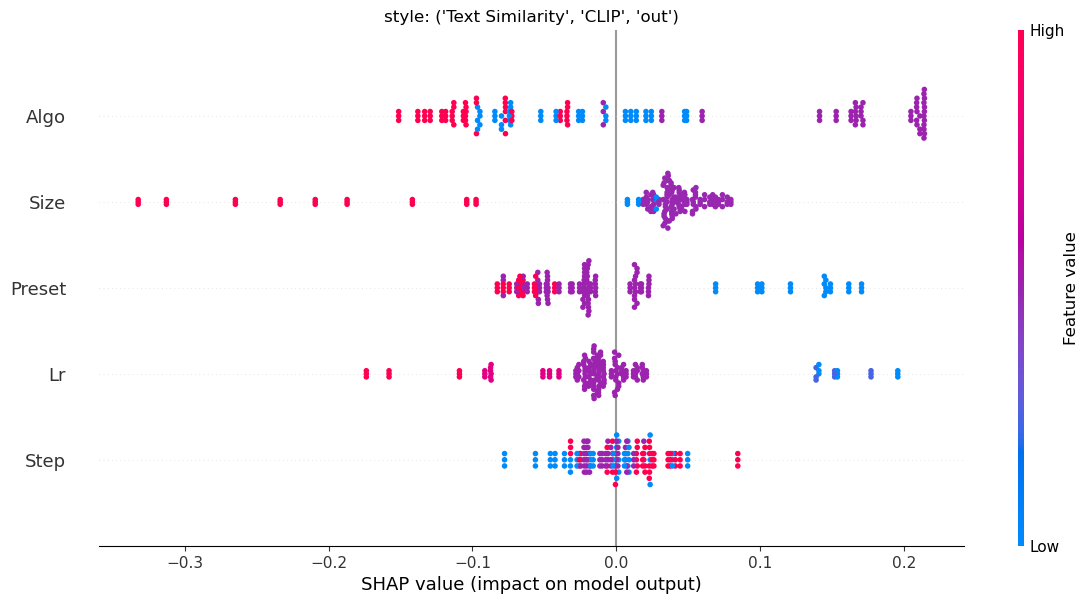

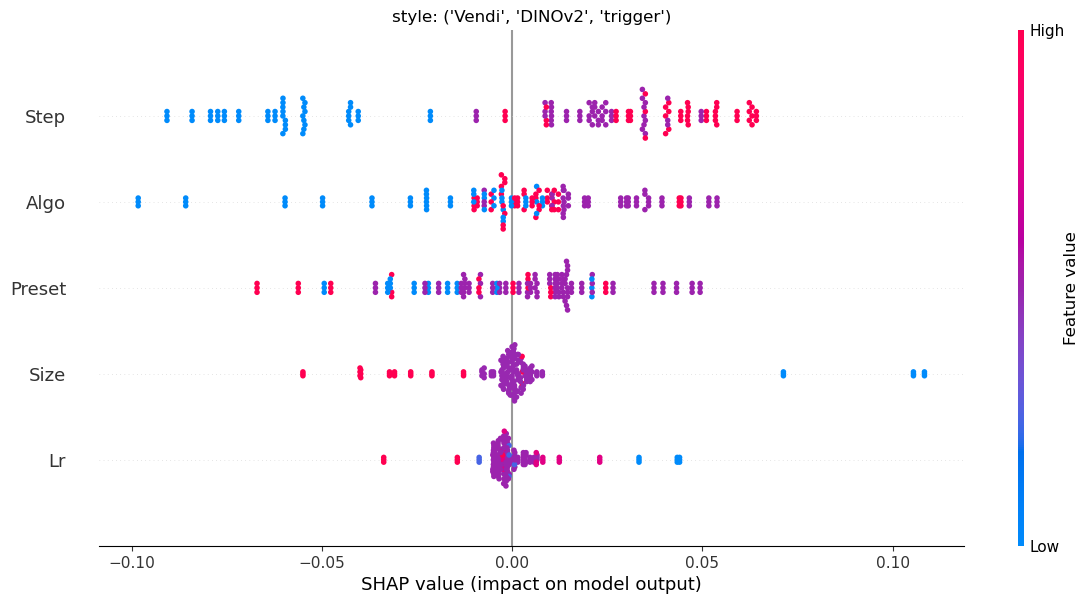

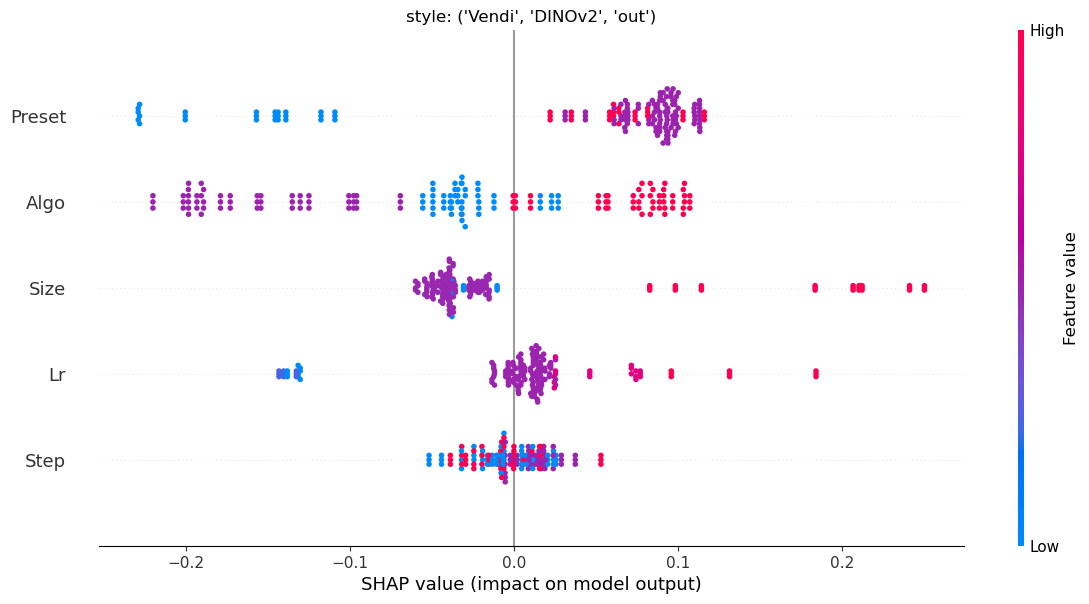

In [640]:
shap_values_list = []

for metric in metrics_to_include:
    plt.figure(figsize=(10, 8))
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      show=False,
                      plot_size=(12, 6))
    shap_values_list.append(shap_values)
    plt.title(f"{category}: {metric}")
    plt.savefig(f"figures/feature_importance/{category}_{metric}_shap.png")

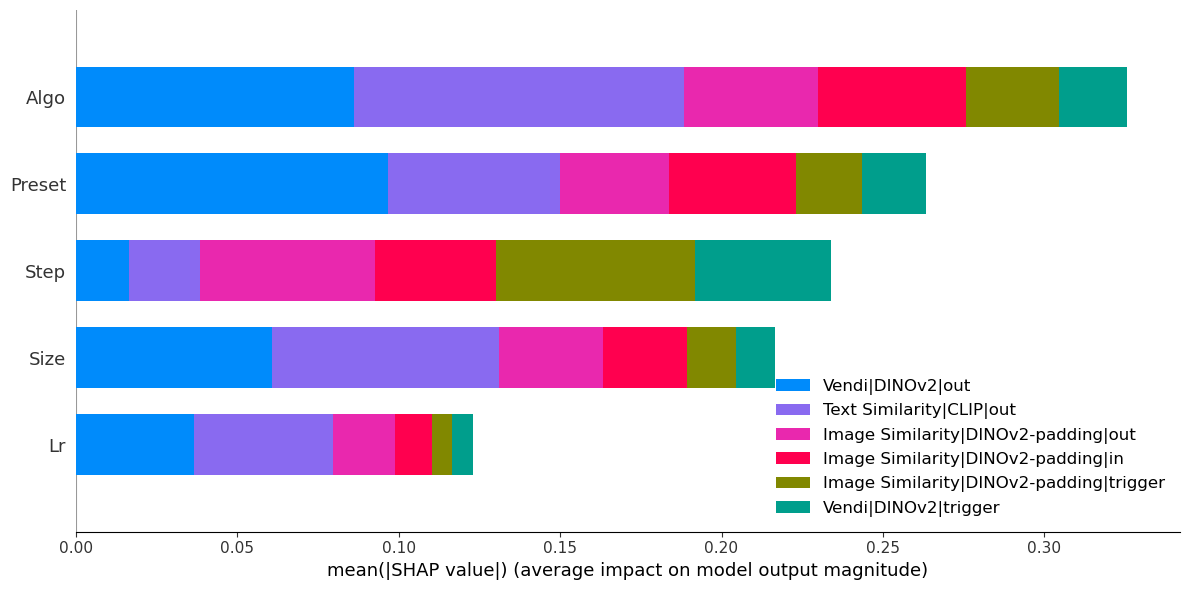

In [596]:
plt.figure(figsize=(20, 12))

shap.summary_plot(
    shap_values_list,
    analysis.X_for_plot,
    plot_type="bar",
    class_names=['|'.join(parts) for parts in metrics_to_include],
    feature_names=analysis.X_for_plot.columns,
    plot_size=(12, 6),
    show=False)
plt.savefig(
    f"figures/feature_importance/{category}_{metric}_shap_feature_importance.png"
)

# Deprecated

## Scene

In [439]:
metrics_scene = metrics_aggregated_cat[metrics_aggregated_cat['Category']=='scene']
metrics_scene.shape

(180, 142)

In [440]:
analysis = FeatureAnalysis(metrics_scene, keyword='scene')

In [441]:
analysis.fit(('Image Similarity', 'DINOv2-padding', 'in'), test_size=None)

Training performance
RMSE: 0.10
R2: 0.77


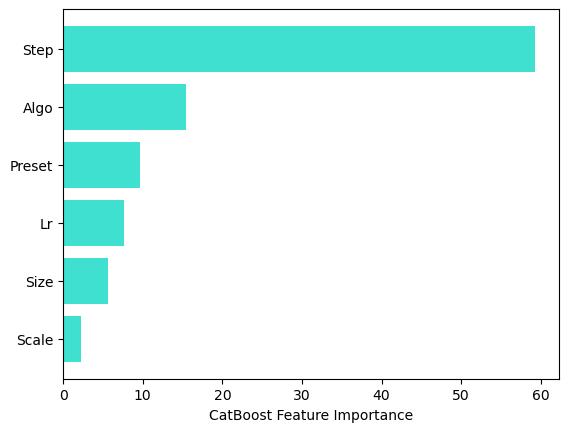

In [442]:
analysis.plot_importance()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


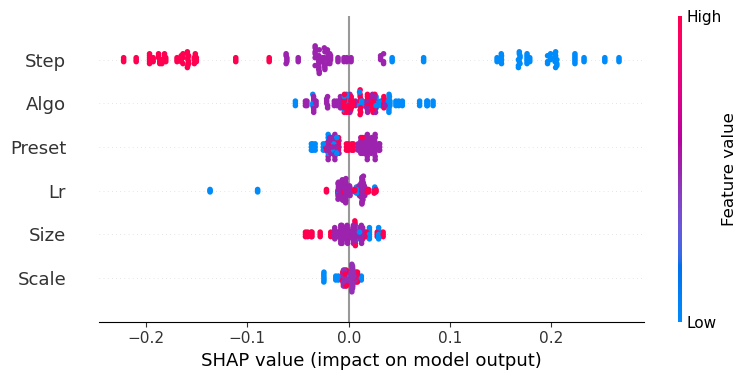

In [443]:
explainer = shap.TreeExplainer(analysis.model)
shap_values = explainer.shap_values(analysis.X_new)
shap.summary_plot(shap_values, analysis.transform_X_for_plot(analysis.X_new), show=False)
plt.savefig("figures/feature_importance/scene_shap.png")

### Step=10

In [474]:
metrics_scene10 = metrics_scene[metrics_scene['Step']==10]
metrics_scene10.shape

(60, 142)

In [475]:
analysis = FeatureAnalysis(metrics_scene10, keyword='scene')

In [476]:
analysis.fit(('Image Similarity', 'DINOv2-padding', 'in'), test_size=None)

Training performance
RMSE: 0.07
R2: 0.80


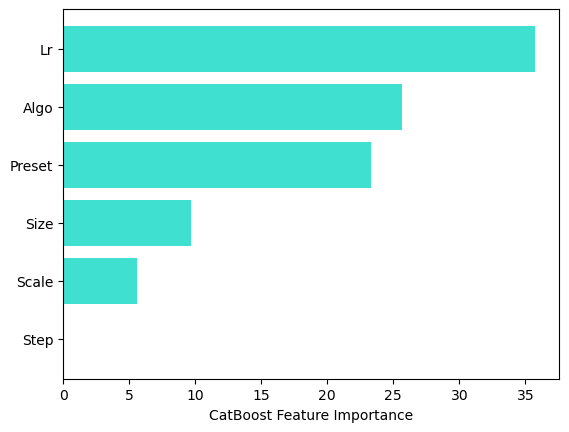

In [477]:
analysis.plot_importance()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


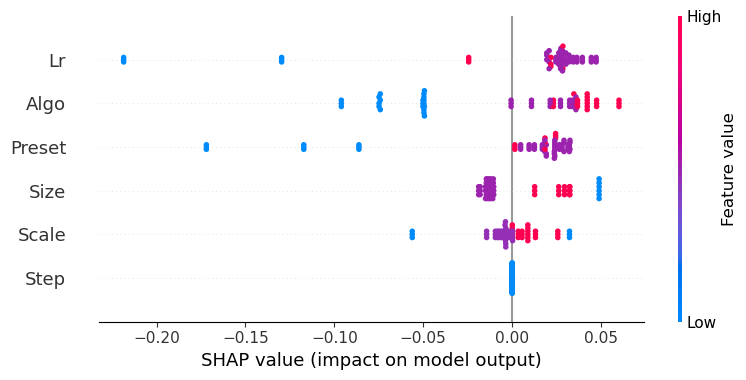

In [478]:
explainer = shap.TreeExplainer(analysis.model)
shap_values = explainer.shap_values(analysis.X_new)
shap.summary_plot(shap_values, analysis.transform_X_for_plot(analysis.X_new), show=False)
# plt.savefig("figures/feature_importance/scene_shap.png")

## Anime

In [469]:
metrics_anime = metrics_aggregated_cat[metrics_aggregated_cat['Category']=='anime']
metrics_anime.shape

(180, 142)

In [470]:
analysis = FeatureAnalysis(metrics_anime, keyword='anime')

In [471]:
analysis.fit(('Image Similarity', 'DINOv2-padding', 'in'), test_size=None)

Training performance
RMSE: 0.17
R2: 0.27


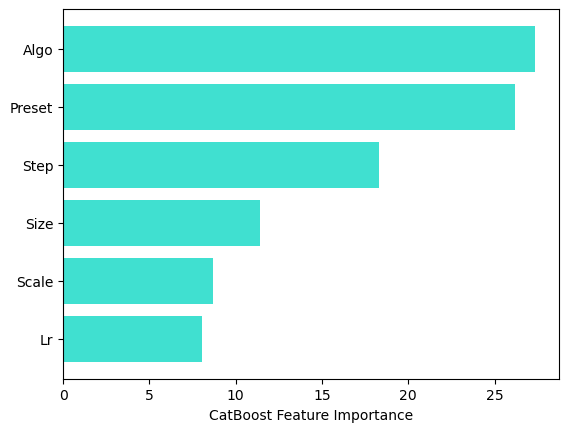

In [472]:
analysis.plot_importance()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


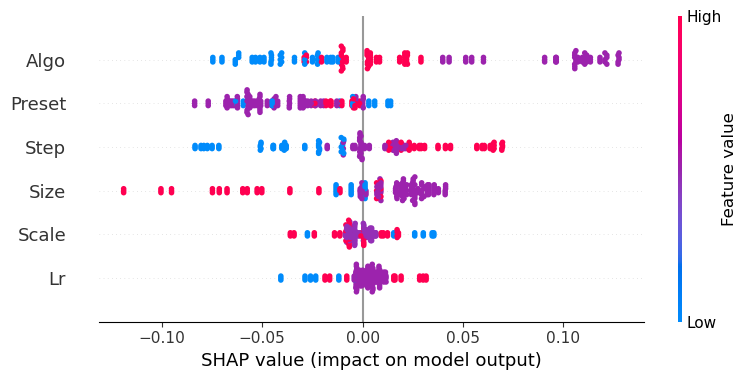

In [473]:
explainer = shap.TreeExplainer(analysis.model)
shap_values = explainer.shap_values(analysis.X_new)
shap.summary_plot(shap_values, analysis.transform_X_for_plot(analysis.X_new), show=False)
plt.savefig("figures/feature_importance/anime_shap.png")

In [500]:
from sklearn.ensemble import RandomForestClassifier

In [501]:
# load the csv file as a data frame
df = pd.read_csv('log2.csv')
y = df.Action.copy()
X = df.drop('Action',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

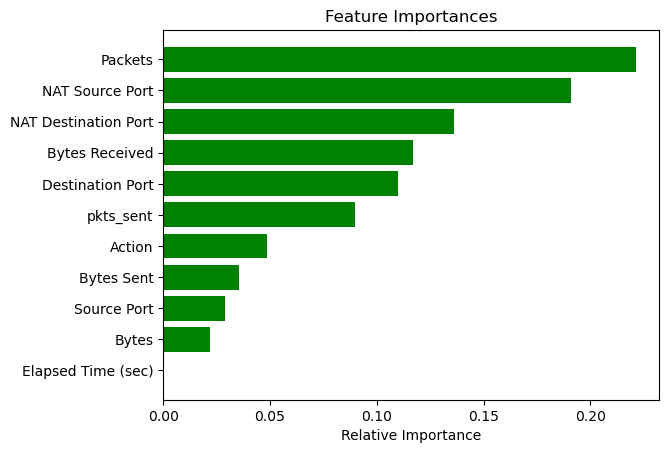

In [502]:
importances = cls.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [503]:
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X)

In [507]:
len(shap_values)

4

In [508]:
X.values

array([[57222,    53, 54587, ...,    30,     1,     1],
       [56258,  3389, 56258, ...,    17,    10,     9],
       [ 6881, 50321, 43265, ...,  1199,     1,     1],
       ...,
       [54871,   445,     0, ...,     0,     1,     0],
       [54870,   445,     0, ...,     0,     1,     0],
       [54867,   445,     0, ...,     0,     1,     0]])